# Phase A : Business Understanding

**-BO1**
Comprendre les caractéristiques statistiques des cryptomonnaies.

**DSO1 :**
Analyse en Composantes Principales (ACP).


**-BO2**
Identifier les similarités entre cryptomonnaies à travers leurs caractéristiques.

**DSO2 :**
Segmentation non supervisée

**-BO3**
Comprendre comment un indicateur de performance évolue dans le futur

**DSO3 :**
Construire un modèle supervisé de prédiction utilisant les variables historiques.  

**-BO4**
Identifier le niveau de stabilité ou d’instabilité des cryptomonnaies afin de mieux comprendre leur profil de risque.  

**DSO4 :**
Développer un modèle permettant de classer les cryptomonnaies dans différentes catégories de risque : Stable, Volatile, Spéculative  

**-BO5**
Comprendre la dynamique directionnelle à court terme : hausse ou baisse potentielle.    

**DSO5 :**
Mettre en place un modèle permettant de prédire la direction du mouvement : Hausse (1) ou Baisse (0).  


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_moons
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import ParameterSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from catboost import CatBoostClassifier
from catboost import Pool
import xgboost as xgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
from scipy.stats import randint, uniform
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

## Phase B: Data understanding

In [56]:
df = pd.read_csv('cryptocurrency.csv')
df_sample = df.sample(n=8000, random_state=42)
df.head()

,timestamp,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap
0,2025-09-02 06:34:11,Ethereum,ETH,"4,373.49",$35.58B,21.09%,-0.72%,-0.97%,$525.69B
1,2025-06-17 15:34:12,BNB,BNB,653.8,$1.73B,1.26%,-0.19%,-1.78%,$92.03B
2,2025-09-01 17:34:12,Stellar,XLM,0.35504,$320.77M,0.16%,-0.49%,-10.44%,$11.15B
3,2025-07-26 14:34:13,Cardano,ADA,0.8229,$1.07B,0.71%,+1.53%,+0.47%,$29.25B
4,2025-05-09 01:34:12,Hyperliquid,HYPE,22.7433,$195.84M,0.12%,+7.97%,+13.10%,$7.59B


**1. Aperçu général:**

In [57]:
# Dimensions
print("Nombre de lignes:", df.shape[0])
print("Nombre de colonnes:", df.shape[1])

# Types de variables et valeurs manquantes
df.info()

# Statistiques descriptives
df.describe().T

Nombre de lignes: 8000
Nombre de colonnes: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   timestamp   8000 non-null   object
 1   name        8000 non-null   object
 2   symbol      8000 non-null   object
 3   price_usd   8000 non-null   object
 4   vol_24h     8000 non-null   object
 5   total_vol   8000 non-null   object
 6   chg_24h     8000 non-null   object
 7   chg_7d      8000 non-null   object
 8   market_cap  7999 non-null   object
dtypes: object(9)
memory usage: 562.6+ KB


,count,unique,top,freq
timestamp,8000,3771,2025-06-11 15:34:13,8
name,8000,30,Chainlink,426
symbol,8000,30,LINK,426
price_usd,8000,6729,1,93
vol_24h,8000,5962,$1.22B,19
total_vol,8000,1466,0.00%,375
chg_24h,8000,1690,+0.01%,188
chg_7d,8000,3156,+0.01%,135
market_cap,7999,3840,$8.31B,27


**2. Analyse des valeurs manquantes**

In [58]:
# Comptage des valeurs manquantes
print (df.isnull().sum())


timestamp     0
name          0
symbol        0
price_usd     0
vol_24h       0
total_vol     0
chg_24h       0
chg_7d        0
market_cap    1
dtype: int64


**3. Analyse des doublons**

In [59]:
# Vérification des doublons
duplicates = df.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


**4. Analyse des variables:**

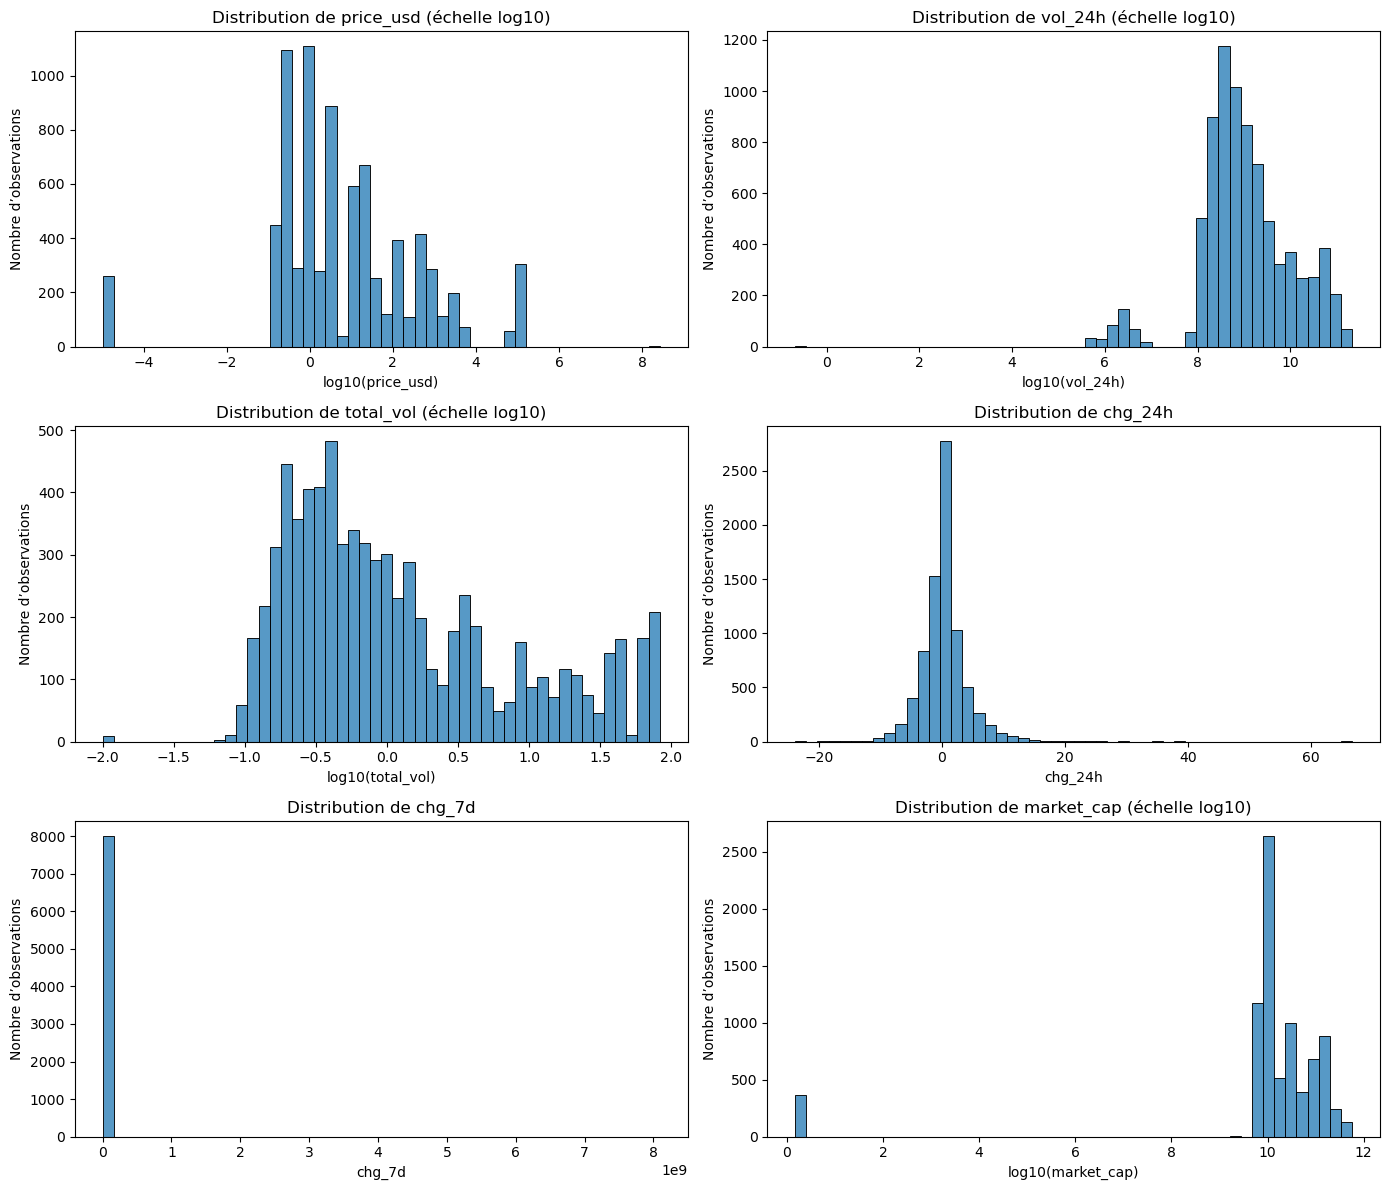

In [60]:
def convert_numeric_like(df, cols, inplace=False):
    out = df if inplace else df.copy()
    for col in cols:
        s = out[col].astype(str)

        s = (s.str.replace(r'[\u00A0\u202F]', ' ', regex=True)   # NBSP/thin space -> space
               .str.replace('$', '', regex=False)
               .str.replace(',', '', regex=False)
               .str.replace('%', '', regex=False)
               .str.replace('–', '-', regex=False)
               .str.replace(r'[^0-9eE\+\-\. KkMmBb]', '', regex=True)
               .str.strip())

        # Extract number and optional suffix (suffix may have spaces before it)
        extracted = s.str.extract(r'([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)(?:\s*([KkMmBb]))?')

        vals = pd.to_numeric(extracted[0], errors='coerce')
        mult = extracted[1].str.upper().map({'K':1e3, 'M':1e6, 'B':1e9}).fillna(1)

        out[col] = vals * mult
    return out

num_cols = ['price_usd', 'vol_24h', 'total_vol', 'chg_24h', 'chg_7d', 'market_cap']

# Temporary conversion for EDA (does NOT modify df)
df_temp = convert_numeric_like(df, num_cols, inplace=False)

# Nombre de figures par ligne
n_cols = 2
n_rows = int(np.ceil(len(num_cols) / n_cols))

# Création de la grille
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    # Nettoyage de la colonne
    s = pd.to_numeric(df_temp[col], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()

    # Appliquer une transformation log pour les colonnes très asymétriques
    if col in ['price_usd', 'vol_24h', 'total_vol', 'market_cap']:
        s = s[s > 0]
        s = np.log10(s)
        sns.histplot(s, bins=50, ax=ax)
        ax.set_xlabel(f'log10({col})')
        ax.set_title(f'Distribution de {col} (échelle log10)')
    else:
        sns.histplot(s, bins=50, ax=ax)
        ax.set_xlabel(col)
        ax.set_title(f'Distribution de {col}')

    ax.set_ylabel('Nombre d’observations')

# Supprimer les axes vides restants
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**1. price_usd**

Distribution très asymétrique.

La majorité des cryptos ont des prix entre 10**(-1) et 10**(2) USD (soit entre 0.1  et100 ).

Quelques valeurs extrêmes au-dessus de 10**(3) $ (par ex. Bitcoin) mais très rares.

La distribution est nettement étirée à droite, montrant une présence réduite de cryptos très coûteuses.

Il y a une forte concentration de tokens à bas prix, ce qui est typique des marchés crypto.

**2. vol_24h**

Distribution très concentrée entre log10(8) et log10(10), soit environ 10⁸–10¹⁰ USD/jour.

Quelques valeurs beaucoup plus faibles ou nulles.

La majorité des cryptos ont un volume de transaction modéré (centaines de millions à quelques milliards de $ par jour).

Quelques cryptos dominent le marché (ex. BTC, ETH) avec des volumes très élevés.

**3. total_vol**
Distribution asymétrique à droite, caractéristique d’un marché concentré.
La majorité des cryptomonnaies ont un volume d’échange total faible à moyen, tandis qu’une minorité de cryptos dominent les transactions avec des volumes très importants.
Cette observation reflète la forte concentration de la liquidité sur quelques actifs majeurs du marché crypto.

**4.chg_24h**
Distribution centrée autour de 0 %, avec symétrie approximative.

Quelques valeurs extrêmes (jusqu’à +60 %, -20 %, voire plus).

Indique que les cryptos bougent fortement au jour le jour, mais la majorité varie entre -10 % et +10 %.

**5.market_cap**

Distribution log10 très nette entre 10**(8) et 10**(11) USD (milliards à milliers de milliards).

Forte asymétrie à droite (quelques cryptos dominantes).

Répartition typique : beaucoup de petits projets à faible capitalisation et quelques uns (BTC, ETH) qui concentrent la majorité du marché.

**5. Relations entre variables**

**a. Matrice de corrélation**

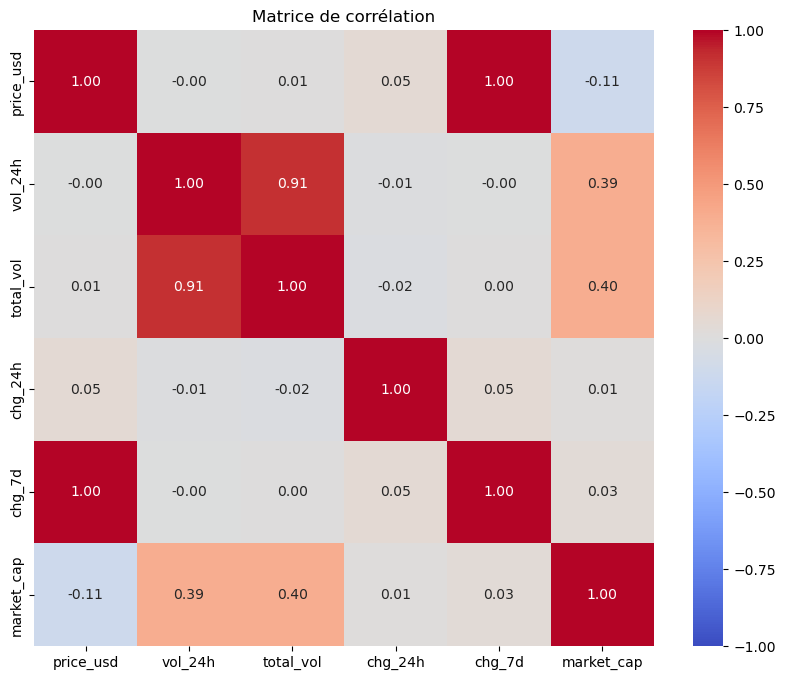

In [61]:
# 2) Correlation on selected columns
corr = df_temp[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de corrélation")
plt.show()

**Observations principales:**  
price_usd et chg_7d (0.57): Les cryptomonnaies dont le prix est plus élevé ont tendance à présenter des variations hebdomadaires plus importantes.  

vol_24h et total_vol (0.91): Corrélation très forte : le volume journalier contribue directement au volume total.  

vol_24h et total_vol et market_cap (0.39): Corrélation positive modérée : les cryptos avec un volume d’échange important tendent à avoir une capitalisation boursière plus élevée.  

price_usd et market_cap (-0.11): Corrélation légèrement négative : certaines cryptos à prix élevé ne représentent pas nécessairement une grande capitalisation (influence du nombre total de jetons en circulation).

chg_24h et chg_7d (0.02): Corrélation faible : les variations journalières ne prédisent pas directement les tendances hebdomadaires à court terme.  

**b. relations entre variables:**

Nombre de paires : 15


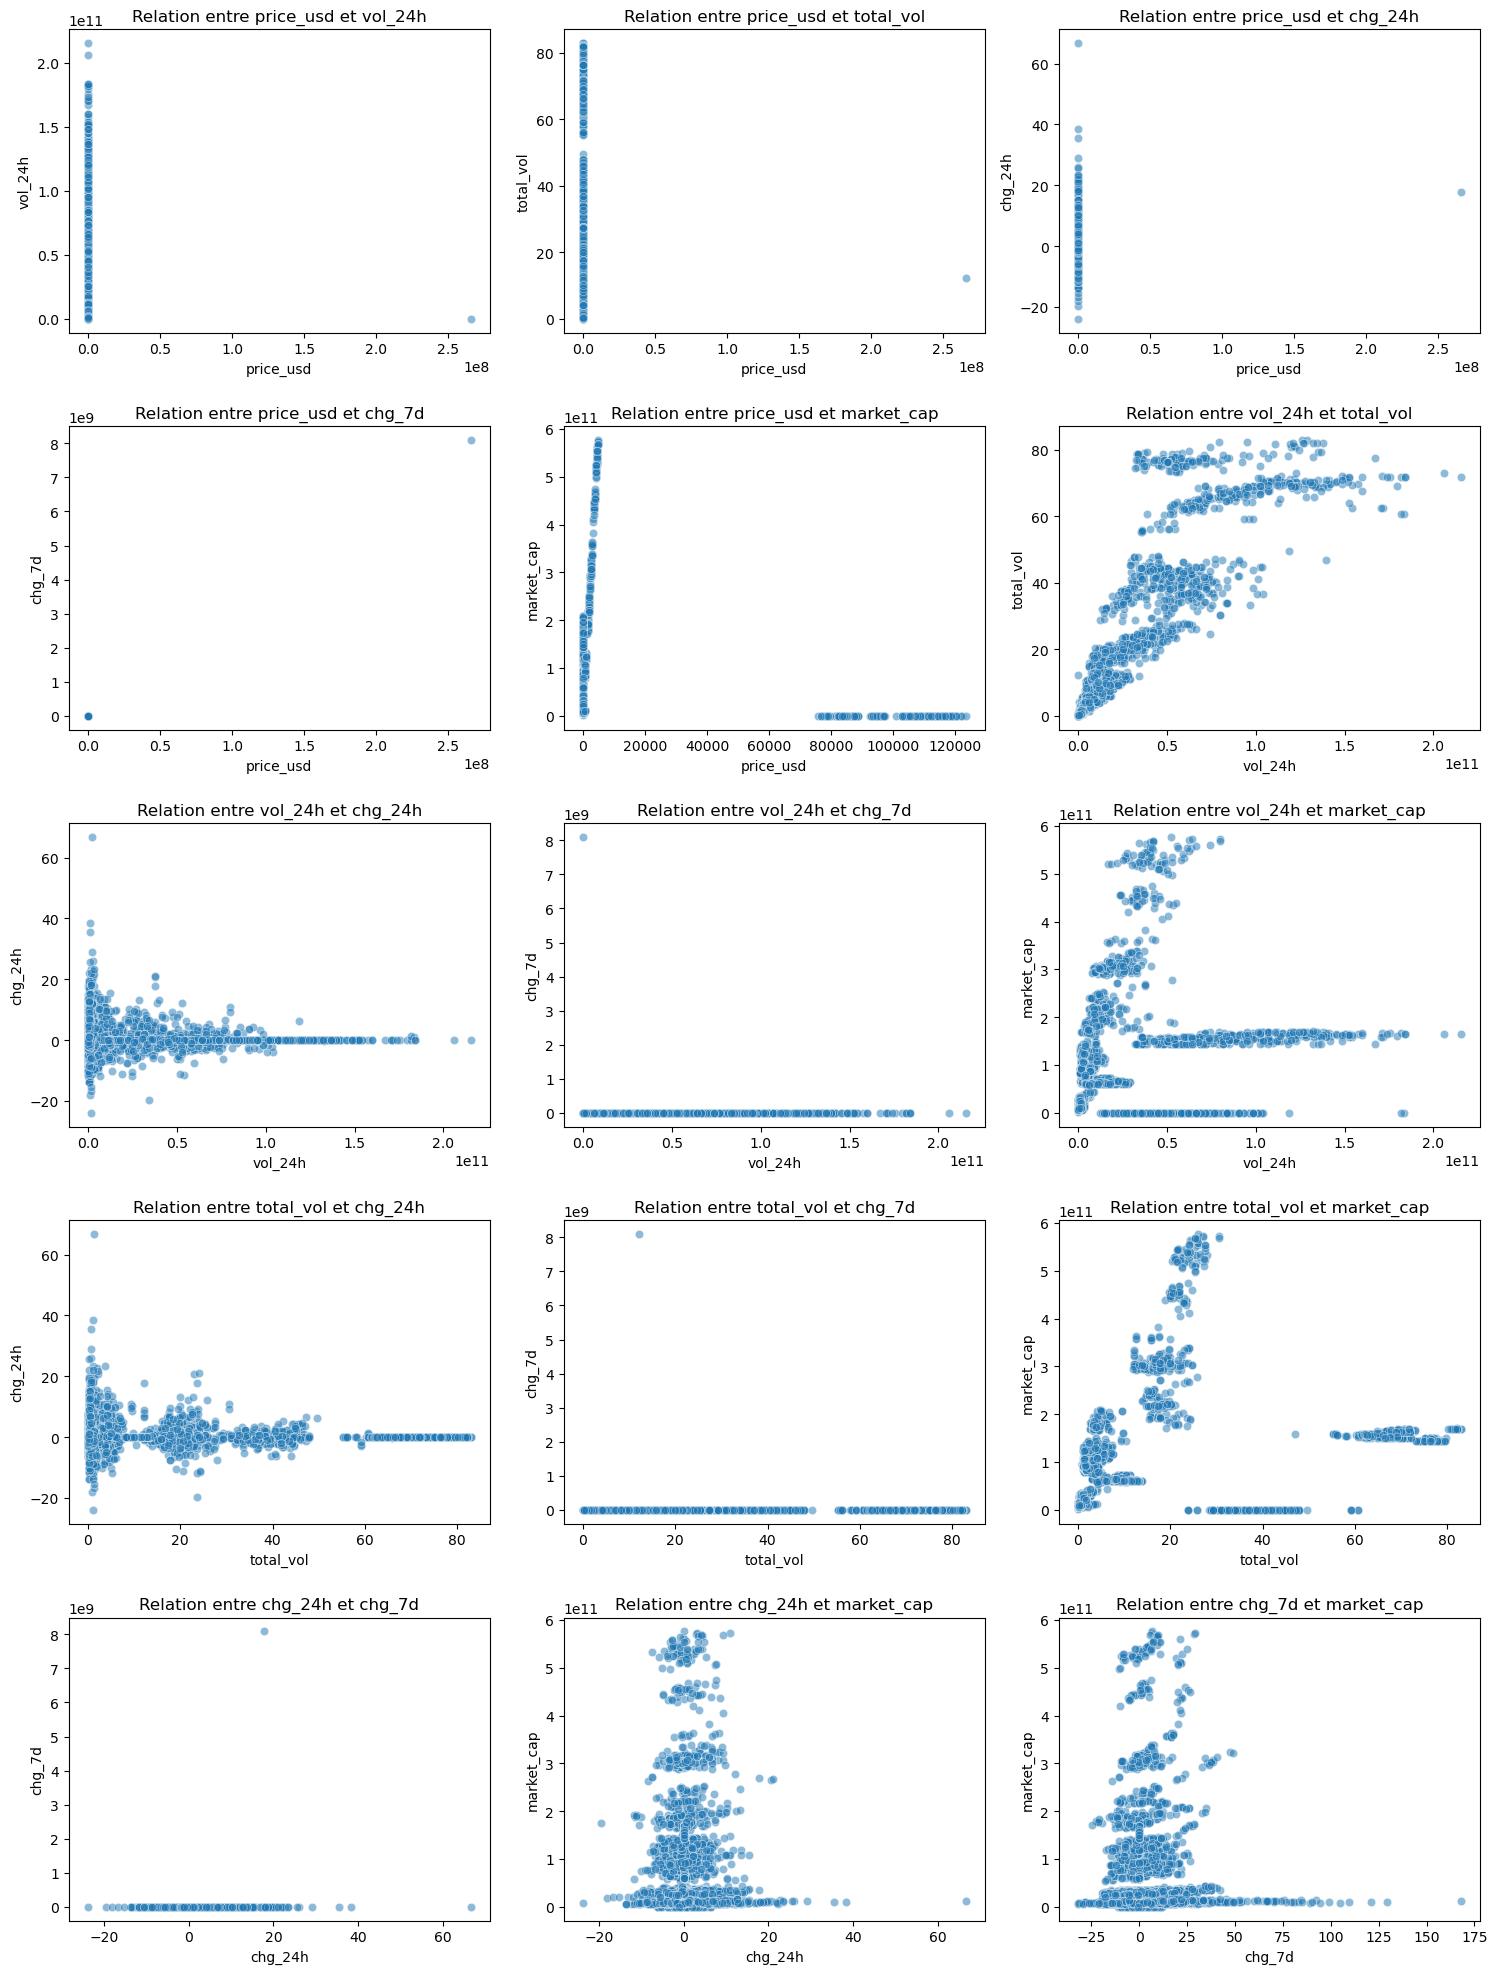

In [62]:
# Colonnes qu'on veut utiliser (toutes sauf les clairement non-numériques)
import math
num_cols = [c for c in df_temp.columns if c not in ['timestamp', 'name', 'symbol']]

# Construire toutes les paires (x, y) sans répétition, sans itertools
pairs = []
for i in range(len(num_cols)):
    for j in range(i + 1, len(num_cols)):
        pairs.append((num_cols[i], num_cols[j]))

print("Nombre de paires :", len(pairs))

# Paramètres de la grille
n_pairs = len(pairs)
n_cols = 3
n_rows = math.ceil(n_pairs / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=df_temp, x=x, y=y, alpha=0.5)
    plt.title(f"Relation entre {x} et {y}")
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()

**Interprétation des Scatterplots**

**price_usd vs vol_24h**
La majorité des cryptos à faible prix présentent un volume journalier faible, tandis que quelques projets majeurs forment des outliers à très fort volume, révélant l’absence de relation linéaire entre prix et activité de marché.

**price_usd vs total_vol**
Les cryptos bon marché concentrent l’essentiel des points avec un volume total faible, alors que les rares cryptos à prix élevé affichent des volumes nettement plus importants, illustrant une relation faible et très dispersée.

**price_usd vs chg_24h**
Le prix n’influence pas les variations quotidiennes : les points sont entièrement dispersés, montrant que les cryptos chères ne sont ni plus ni moins volatiles que les cryptos à bas prix.

**price_usd vs chg_7d**
Aucune structure n’apparaît entre le prix et la variation hebdomadaire, soulignant l’indépendance totale entre valorisation unitaire et volatilité à moyen terme.

**price_usd vs market_cap**
La capitalisation ne dépend pas du prix unitaire, car les cryptos très chères peuvent avoir une market cap modeste et les cryptos très bon marché une market cap énorme, ce qui explique la dispersion totale du nuage de points.

**vol_24h vs total_vol**
Les deux volumes présentent une relation très nette : plus le volume journalier est élevé, plus le volume total augmente, ce qui confirme leur dépendance fonctionnelle et en fait la relation la plus forte du dataset.

**vol_24h vs chg_24h**
Le volume n’impacte pas la variation quotidienne : la dispersion homogène autour de zéro montre que le marché peut bouger fortement même lorsque l’activité est faible (et inversement).

**vol_24h vs chg_7d**
Les variations hebdomadaires ne montrent aucune tendance par rapport au volume journalier, traduisant une volatilité indépendante de l’activité de marché.

**vol_24h vs market_cap**
Les cryptos à forte capitalisation ont tendance à afficher des volumes plus élevés, mais la dispersion importante confirme une relation réelle mais non linéaire influencée par le type de projet.

**total_vol vs chg_24h**
Les variations sur 24 h sont totalement indépendantes du volume cumulé, avec un nuage de points sans structure et centré autour de zéro.

**total_vol vs chg_7d**
Le volume total n’explique pas les variations hebdomadaires, comme le montre une dispersion uniforme sans tendance identifiable.

**total_vol vs market_cap**
Les cryptos à grande capitalisation dominent logiquement les volumes, mais la présence de plusieurs “niveaux” de dispersion révèle des groupes distincts (small, mid, large caps) et une relation positive mais hétérogène.

**chg_24h vs chg_7d**
Les variations quotidiennes ne prédisent pas les mouvements hebdomadaires : les deux axes sont quasi indépendants, signe d’une volatilité erratique caractéristique du marché crypto.

**chg_24h vs market_cap**
Les fluctuations journalières sont indépendantes de la capitalisation : petites et grandes cryptos peuvent varier fortement, ce qui explique la dispersion totale du graphique.

**chg_7d vs market_cap**
Les variations sur 7 jours ne suivent aucune tendance en fonction de la capitalisation, montrant qu’un projet peut être très stable ou très spéculatif indépendamment de sa taille.

**6. Analyse des outliers**

C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


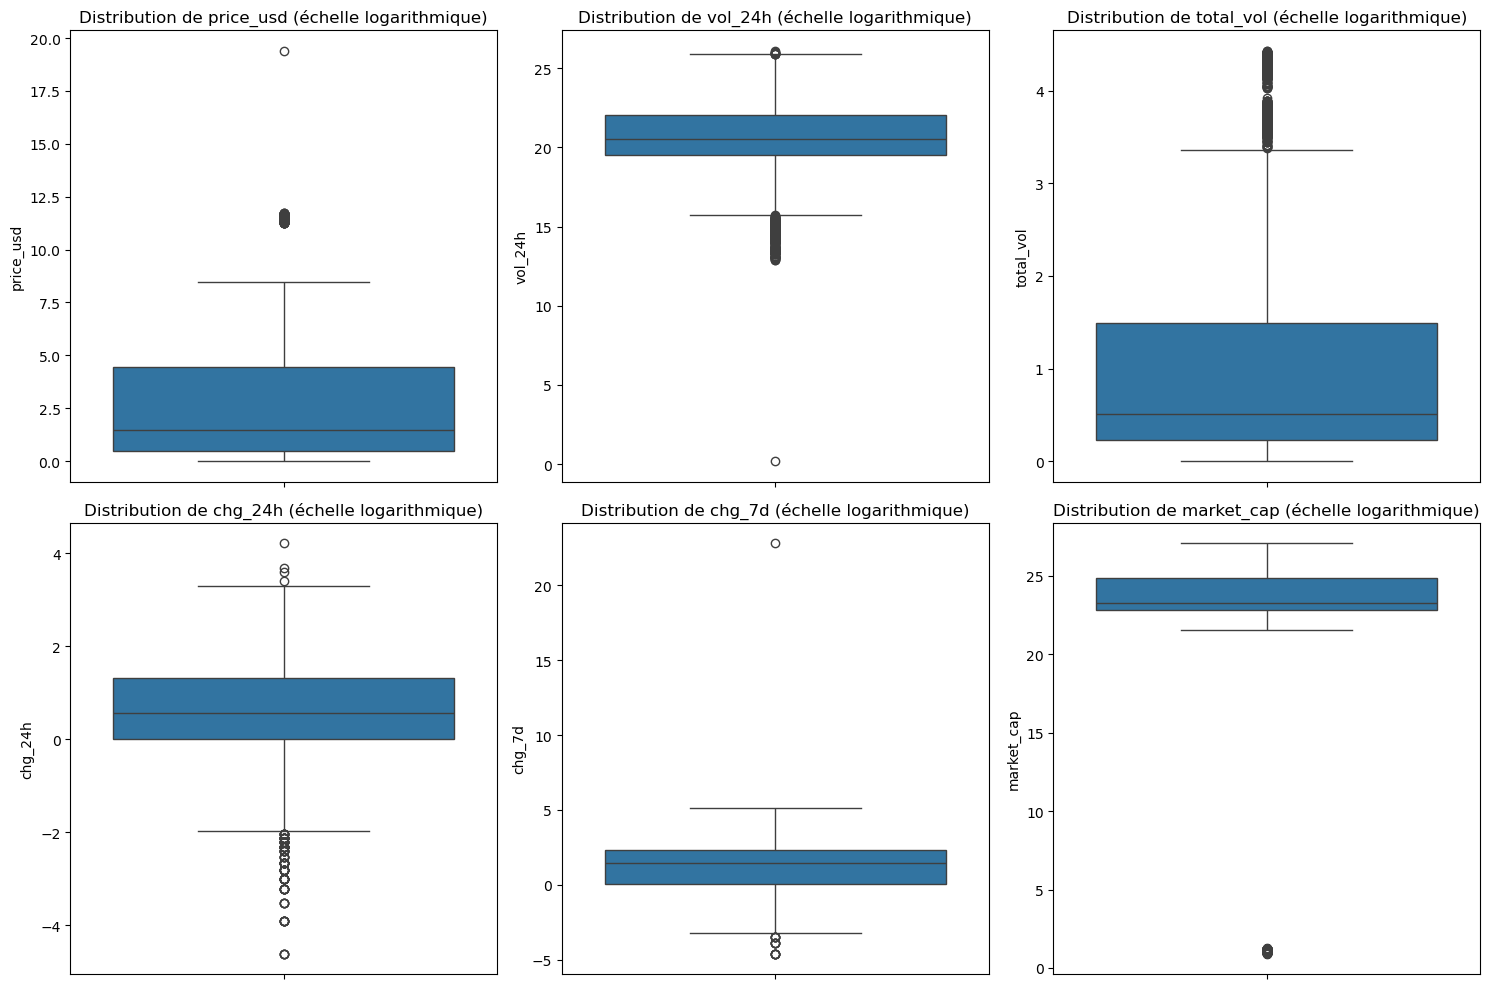

In [63]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=np.log1p(df_temp[col]))
    plt.title(f"Distribution de {col} (échelle logarithmique)")
plt.tight_layout()
plt.show()

**Echelle logarithmique**

L’utilisation d’une échelle logarithmique permet de mieux visualiser la répartition des variables très dispersées.

**Interprétation:**

**price_usd**  
La majorité des cryptomonnaies ont un prix faible (proche de zéro).  
Quelques outliers, très élevés, correspondent à des cryptos majeures qui dominent le marché en termes de valeur unitaire.  
La distribution est donc fortement asymétrique à droite.

**vol_24h**  
La distribution est très étendue avec une forte concentration de petits volumes et plusieurs outliers à volumes extrêmement élevés.  
Cela traduit une activité de marché très inégale.

**total_vol**  
Forte asymétrie: la majorité des cryptos ont un volume total faible, tandis que certaines affichent des volumes exceptionnels qui représentent des périodes d’échanges intensifs sur les cryptos populaires.

**chg_24h**  
Outliers: Les variations quotidiennes sont centrées autour de 0, mais plusieurs points s’éloignent fortement de la boîte centrale.  
Ces outliers correspondent à des fortes hausses ou baisses ponctuelles.

**chg_7d**  
Outliers: souvent liés à des événements de marché ou annonces spécifiques.

**market_cap**  
Distribution très étendue avec une concentration de valeurs faibles et quelques outliers.  
Les outliers représentent les leaders du marché.  

## **Phase C: Data Prepration** ##

**1.Data cleaning**

In [64]:
# columns total_vol and vol_24 are highly correlated (0.92)
df = df.drop(columns=["total_vol"])

In [65]:
# Columns to clean
num_cols = ['price_usd','vol_24h','chg_24h','chg_7d','market_cap']
print(df[num_cols].dtypes)
print(df[num_cols].head())
#Conversion en colonnes numériques:
df = convert_numeric_like(df, num_cols, inplace=False)
print(df[num_cols].dtypes)


price_usd     object
vol_24h       object
chg_24h       object
chg_7d        object
market_cap    object
dtype: object
  price_usd   vol_24h chg_24h   chg_7d market_cap
0  4,373.49   $35.58B  -0.72%   -0.97%   $525.69B
1     653.8    $1.73B  -0.19%   -1.78%    $92.03B
2   0.35504  $320.77M  -0.49%  -10.44%    $11.15B
3    0.8229    $1.07B  +1.53%   +0.47%    $29.25B
4   22.7433  $195.84M  +7.97%  +13.10%     $7.59B
price_usd     float64
vol_24h       float64
chg_24h       float64
chg_7d        float64
market_cap    float64
dtype: object


In [66]:
#Conversion en colonnes numériques:
df = convert_numeric_like(df, num_cols, inplace=False)
print(df[num_cols].dtypes)

price_usd     float64
vol_24h       float64
chg_24h       float64
chg_7d        float64
market_cap    float64
dtype: object


In [67]:
#suppression des nan
print("Taille avant suppression des NaN :", df.shape)
print(df[num_cols].isna().sum())
df = df.dropna(subset=num_cols)
print("Taille après suppression des NaN :", df.shape)
print(df[num_cols].isna().sum())

Taille avant suppression des NaN : (8000, 8)
price_usd     0
vol_24h       0
chg_24h       0
chg_7d        0
market_cap    1
dtype: int64
Taille après suppression des NaN : (7999, 8)
price_usd     0
vol_24h       0
chg_24h       0
chg_7d        0
market_cap    0
dtype: int64


In [68]:
df.describe()

,price_usd,vol_24h,chg_24h,chg_7d,market_cap
count,7999.000000,7.999000e+03,7999.000000,7999.000000,7.999000e+03
mean,4921.901998,9.370929e+09,0.347490,2.148977,5.233676e+10
std,21781.966056,2.311838e+10,3.777801,10.815838,8.377845e+10
min,0.000010,3.897900e+05,-23.840000,-31.940000,1.490000e+00
25%,0.615550,3.021150e+08,-1.420000,-3.030000,8.420000e+09
50%,3.329800,8.398600e+08,0.010000,0.020000,1.288000e+10
75%,85.495000,3.840000e+09,1.750000,5.815000,6.459000e+10
max,123361.900000,2.154500e+11,66.670000,167.890000,5.767000e+11


**2.Génération colonne Risk**

In [69]:
df_risk = df.copy() #copie bch manehlkouch df wahna nehsbou #timestamp nrodouha date bch nekhdmou bihia

df_risk = df_risk.sort_values(['symbol', 'timestamp']) #nrodouhom b ordre shih hasb date
df_risk = df_risk.set_index(['symbol', 'timestamp']) #namlou indexation

df_risk['future_vol_7d'] = (
    df_risk.groupby(level='symbol')['price_usd']
          .pct_change(7)
          .shift(-7)
          .abs()
) #nehsbou changement de prix mebin lioum w dans 7 jours
    # baed nhezou l info edhika lel ligne mtaa lioum
def classify_future_risk(v):
    if v < 0.05:
        return 'Stable'
    elif v < 0.20:
        return 'Volatile'
    else:
        return 'Speculative'
df_risk['risk'] = df_risk['future_vol_7d'].apply(classify_future_risk)
df_risk_reset = df_risk.reset_index()  # symbol + timestamp redeviennent colonnes
df = df.merge(
    df_risk_reset[['symbol', 'timestamp', 'risk']],
    on=['symbol', 'timestamp'],
    how='left'
) #hatina colonne risk f df mteena maghir ma nbadlouha
df = df.dropna(subset=['risk']) #nahiw les colones lekhrenin li maandhomch future 7 jours
df.head()

,timestamp,name,symbol,price_usd,vol_24h,chg_24h,chg_7d,market_cap,risk
0,2025-09-02 06:34:11,Ethereum,ETH,4373.49000,3.558000e+10,-0.72,-0.97,5.256900e+11,Stable
1,2025-06-17 15:34:12,BNB,BNB,653.80000,1.730000e+09,-0.19,-1.78,9.203000e+10,Stable
2,2025-09-01 17:34:12,Stellar,XLM,0.35504,3.207700e+08,-0.49,-10.44,1.115000e+10,Stable
3,2025-07-26 14:34:13,Cardano,ADA,0.82290,1.070000e+09,1.53,0.47,2.925000e+10,Volatile
4,2025-05-09 01:34:12,Hyperliquid,HYPE,22.74330,1.958400e+08,7.97,13.10,7.590000e+09,Volatile


**3.Data transformation**

In [70]:
# log
log_cols = ['price_usd', 'vol_24h', 'market_cap']
for col in log_cols:
    df[col] = np.log1p(df[col])
df.describe()

,price_usd,vol_24h,chg_24h,chg_7d,market_cap
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,2.759502,20.795797,0.347490,2.148977,22.885908
std,2.987388,2.300014,3.777801,10.815838,4.881995
min,0.000010,12.873366,-23.840000,-31.940000,0.912283
25%,0.479675,19.526318,-1.420000,-3.030000,22.853876
50%,1.465521,20.548746,0.010000,0.020000,23.278942
75%,4.460086,22.068738,1.750000,5.815000,24.891325
max,11.722886,26.095995,66.670000,167.890000,27.080588


In [71]:
scaler = StandardScaler()
cols_to_scale = ['price_usd','vol_24h','market_cap','chg_24h','chg_7d']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [72]:
df.describe()

,price_usd,vol_24h,chg_24h,chg_7d,market_cap
count,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03
mean,5.329737e-17,-2.025300e-16,7.106316e-18,3.597572e-17,-3.881825e-16
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-9.237717e-01,-3.444730e+00,-6.402932e+00,-3.151962e+00,-4.501234e+00
25%,-7.631983e-01,-5.519783e-01,-4.678913e-01,-4.788627e-01,-6.561826e-03
50%,-4.331749e-01,-1.074195e-01,-8.934054e-02,-1.968512e-01,8.051169e-02
75%,5.692903e-01,5.534842e-01,3.712737e-01,3.389707e-01,4.108039e-01
max,3.000596e+00,2.304564e+00,1.755695e+01,1.532488e+01,8.592680e-01


**4.ACP**

In [73]:
#Sélection des features pour l'ACP:
features_acp = ['price_usd', 'vol_24h', 'market_cap', 'chg_24h', 'chg_7d']
X = df[features_acp]
print("Dimensions avant ACP :", X.shape)

Dimensions avant ACP : (7999, 5)


In [74]:
# Convertir en DataFrame pour garder les noms de colonnes
X = pd.DataFrame(X, columns=features_acp)

In [75]:
pca = PCA()# on garde toutes les composantes
X_pca = pca.fit_transform(X)

In [76]:
eig = pd.DataFrame({
    "Composante": [f"PC{i+1}" for i in range(len(pca.explained_variance_))],
    "Valeur propre": np.round(pca.explained_variance_, 3),
    "Variance expliquée (%)": np.round(pca.explained_variance_ratio_ * 100, 2),
    "Variance cumulée (%)": np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2)
})
print(eig)


  Composante  Valeur propre  Variance expliquée (%)  Variance cumulée (%)
0        PC1          1.746                   34.91                 34.91
1        PC2          1.385                   27.70                 62.60
2        PC3          0.845                   16.89                 79.50
3        PC4          0.617                   12.34                 91.84
4        PC5          0.408                    8.16                100.00


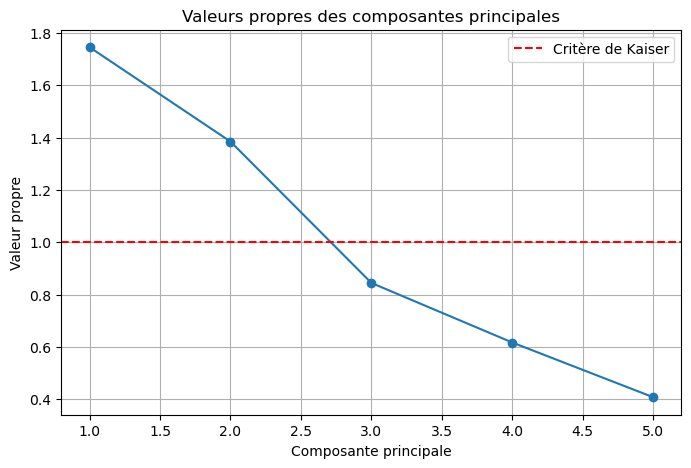

In [77]:
# --- Scree plot avec critère de Kaiser ---
eigenvalues = pca.explained_variance_  # <-- la vraie ligne (CORRECTION !)
components = np.arange(1, len(eigenvalues) + 1)

plt.figure(figsize=(8,5))
plt.plot(components, eigenvalues, marker="o")
plt.axhline(y=1, color='r', linestyle='--', label='Critère de Kaiser')

plt.title("Valeurs propres des composantes principales")
plt.xlabel("Composante principale")
plt.ylabel("Valeur propre")
plt.grid(True)
plt.legend()
plt.show()


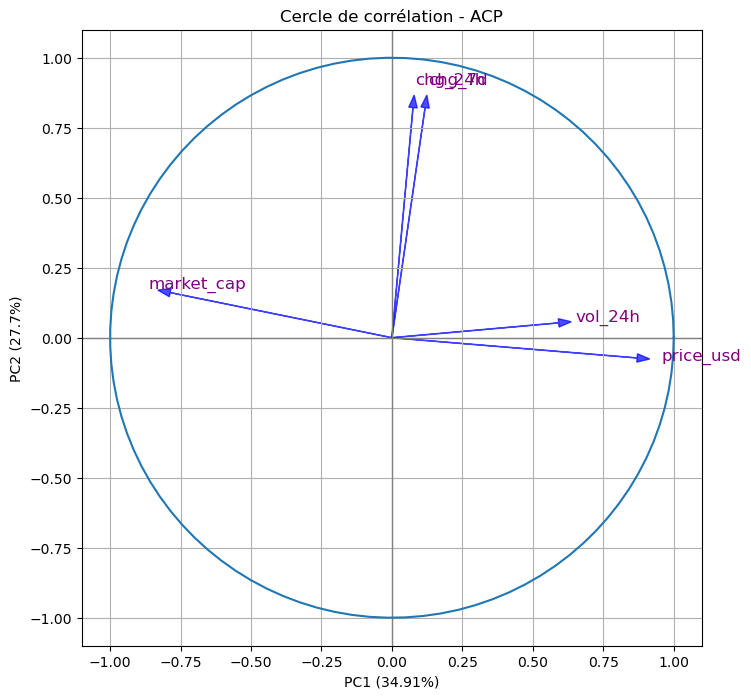

In [78]:
pcs = pca.components_

correlations = pcs.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(8,8))
plt.axhline(0, color='grey', linewidth=1)
plt.axvline(0, color='grey', linewidth=1)

theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta))

for i, variable in enumerate(features_acp):
    x = correlations[i, 0]
    y = correlations[i, 1]
    plt.arrow(0, 0, x, y, color='b', head_width=0.03, alpha=0.7)
    plt.text(x*1.1, y*1.1, variable, fontsize=12, color='purple')

plt.xlabel(f"PC1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
plt.ylabel(f"PC2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")
plt.title("Cercle de corrélation - ACP")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(True)
plt.show()



**Interprétation du cercle de corrélation**

Le cercle de corrélation montre une structure claire à deux dimensions :

* **PC1 (35.41%)** est dominée par price_usd et vol_24h, situées du même côté, ce
qui

indique une corrélation positive entre ces deux variables. À l’opposé, market_cap apparaît dans la direction inverse, confirmant une corrélation négative avec price_usd dans notre échantillon. PC1 représente donc un axe lié à la valeur économique des cryptomonnaies.

* **PC2 (27.43%)** est principalement portée par chg_24h et chg_7d, dont les flèches sont longues et presque superposées. Cela confirme une forte corrélation entre les variations journalières et hebdomadaires. PC2 représente un axe de volatilité / dynamique des prix.

Cette interprétation est totalement cohérente avec la matrice de corrélation obtenue auparavant, qui montrait notamment une corrélation très élevée entre chg_24h et chg_7d, ainsi qu’une relation plus faible entre price_usd et market_cap.


**Interprétation :**
- Interprétation PC1 vs PC2 :

Les points forment 3 grands groupes : un petit cluster à gauche, un groupe central dense, et un cluster serré à droite.

PC1 sépare les observations selon la taille/importance du marché (petites → gauche, grandes → droite).

PC2 capture la volatilité / variation 24h (points très hauts = cryptos très volatiles).

Quelques outliers très hauts indiquent des variations extrêmes.

- Interprétation PC1 vs PC3 :

Les clusters deviennent encore plus visibles : plusieurs sous-groupes bien séparés apparaissent.

PC3 ajoute une nouvelle dimension de différence entre cryptos (profil interne spécifique).

Des bandes horizontales à droite indiquent des observations très similaires sur PC3.

In [79]:
# ACP Finale (2 composantes)
pca_final = PCA(n_components=2)
X_pca2 = pca_final.fit_transform(X)

# DataFrame des deux composantes
df_pca = pd.DataFrame(X_pca2, columns=["PC1", "PC2"])


## Phase C: Modeling et évaluation ##
**Modèles Non Supervisés**

**1.DBSCAN**  

In [80]:
df_pca.head()


,PC1,PC2
0,1.379232,-0.330724
1,0.585581,-0.354138
2,-0.923556,-0.934025
3,-0.621056,0.188490
4,-0.020638,2.070770


In [81]:
df_corr = df.copy()
for col in df_corr.columns:
    try:
        df_corr[col] = pd.to_datetime(df_corr[col], format="%Y-%m-%d %H:%M:%S")
        df_corr[col] = df_corr[col].astype('int64') // 10**9  # timestamp en secondes
    except:
        pass

#Garder uniquement les colonnes numériques
df_numeric = df_corr.select_dtypes(include=[np.number]).copy()

In [82]:
X_dbscan = df_pca.values   # PCA = les 2 composantes finales


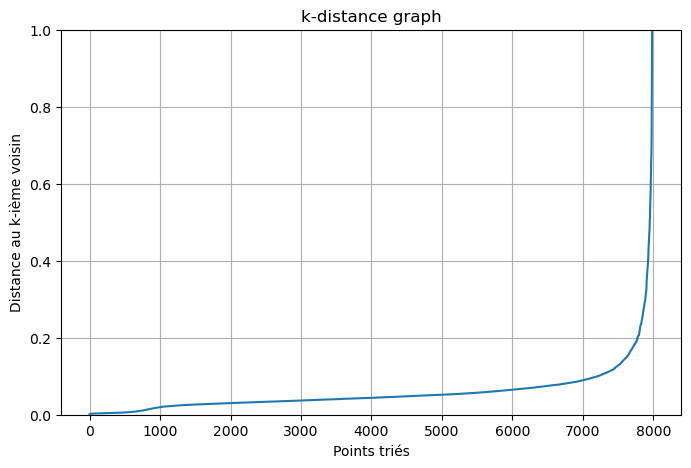

In [83]:
k = 8
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_dbscan)

distances, _ = neigh.kneighbors(X_dbscan)
distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.ylim(0, 1)
plt.title("k-distance graph")
plt.xlabel("Points triés")
plt.ylabel("Distance au k-ième voisin")
plt.grid(True)
plt.show()

In [84]:
param_grid = {
    'eps': np.linspace(0.3, 1.0, 20),
    'min_samples': range(3, 10)
}

# RandomizedSearch manuel
n_iter = 20  # nombre d'essais aléatoires
param_list = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

best_score = -1
best_params = None

for params in param_list:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X_dbscan)

    # Ignorer les essais où tout est un seul cluster ou que tout est bruit (-1)
    if len(set(labels)) > 1 and len(set(labels)) < len(X_dbscan):
        score = silhouette_score(X_dbscan, labels)
        if score > best_score:
            best_score = score
            best_params = params

print("Meilleurs paramètres trouvés :", best_params)
print("Meilleur silhouette score :", best_score)

Meilleurs paramètres trouvés : {'min_samples': 7, 'eps': 0.8526315789473684}
Meilleur silhouette score : 0.7443555684331484


In [85]:
dbscan = DBSCAN(eps=0.06, min_samples=8)
clusters = dbscan.fit_predict(X_dbscan)

# Ajouter les clusters au DataFrame
df_pca['cluster'] = clusters
print(df_pca['cluster'].value_counts())


cluster
 2     4691
-1     1592
 1      909
 4      259
 5       71
 14      67
 3       56
 8       37
 11      23
 21      20
 25      18
 24      17
 19      14
 22      13
 6       13
 0       12
 9       12
 7       12
 30      11
 15      11
 34      11
 23      10
 27      10
 28       9
 10       9
 32       8
 13       8
 35       8
 18       8
 16       8
 20       8
 26       8
 33       8
 12       7
 29       7
 17       7
 31       7
Name: count, dtype: int64


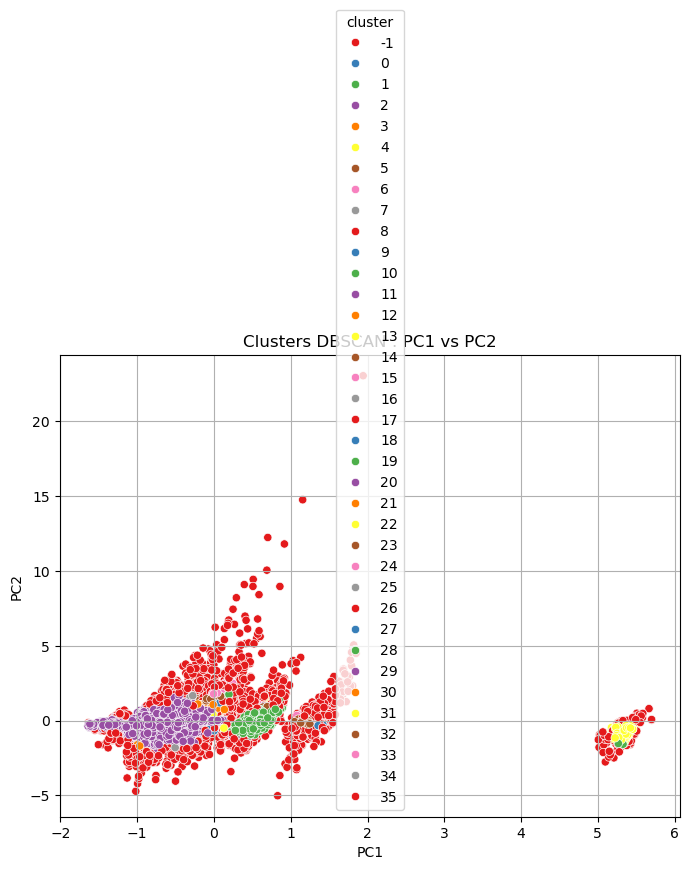

In [86]:
# PC1 vs PC2
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='Set1',
    data=df_pca,
    legend='full'
)
plt.title('Clusters DBSCAN : PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

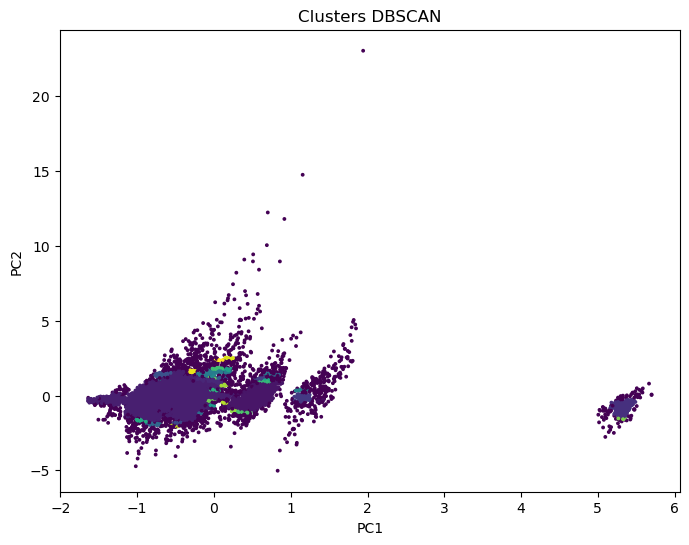

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(X_dbscan[:,0], X_dbscan[:,1], c=clusters, s=3, cmap='viridis')
plt.title("Clusters DBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


**Interprétation du DBSCAN :**
- Cluster 1 (points verts) :

C’est le cluster principal, très large. Il regroupe la grande majorité des observations.
Ce sont les cryptos “normales”, sans comportement extrême :
valeurs stables sur PC1 (taille du marché),
variations modérées sur PC2 et PC3.
- Cluster 0 (points bleus) :
Petit groupe bien séparé, surtout visible à droite dans PC1-P2 et clairement dans PC1-PC3.
Ce cluster représente des cryptos ayant :
un profil spécifique et homogène,souvent une même structure de marché (PC1 élevé).
 - Cluster -1 (points rouges) = les “bruits” / outliers :

Ce sont les observations que DBSCAN ne peut rattacher à aucun cluster. On les voit :
très haut sur PC2 → cryptos très volatiles,
très bas sur PC3 → valeurs atypiques,
ou dans des zones isolées.
Ce sont donc des comportements extrêmes/anormaux que DBSCAN identifie comme du bruit.

**2.CAH**

In [92]:
#Préparation des données
X = df[['price_usd', 'vol_24h', 'market_cap', 'chg_24h', 'chg_7d']]

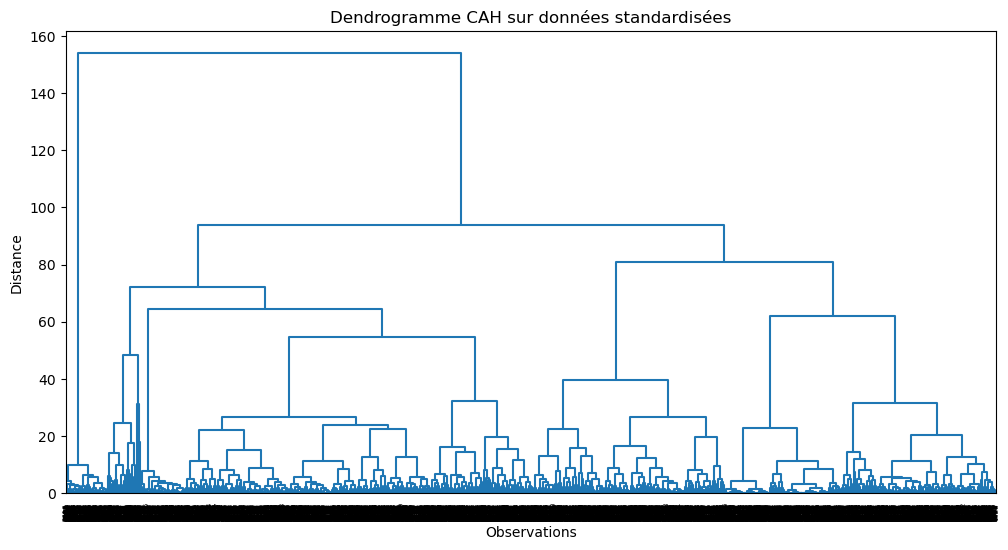

In [93]:
# tracage du dendogramme
Z = linkage(X, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z,
           truncate_mode='level',  # tronque pour plus de lisibilité
           p=30,                   # montre les 30 derniers niveaux
           color_threshold=0)
plt.title("Dendrogramme CAH sur données standardisées")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

**Interprétation**  
Une séparation majeure à une hauteur élevée (~150)  
Cela indique l’existence de deux grands groupes très différents dans les données.  

À des niveaux intermédiaires (entre 60 et 100)  
On observe la division de ces grands groupes en sous-groupes cohérents, révélant plusieurs profils de comportements.  

À de faibles distances (< 20)  
De nombreuses petites fusions apparaissent :  
elles représentent des cryptomonnaies très similaires entre elles selon les variables utilisées (prix, volume, variations, market cap).  

In [94]:
# decouper l'arbre en clusters
n_clusters = 3
clusters = fcluster(Z, n_clusters, criterion='maxclust')
df['cluster_cah'] = clusters

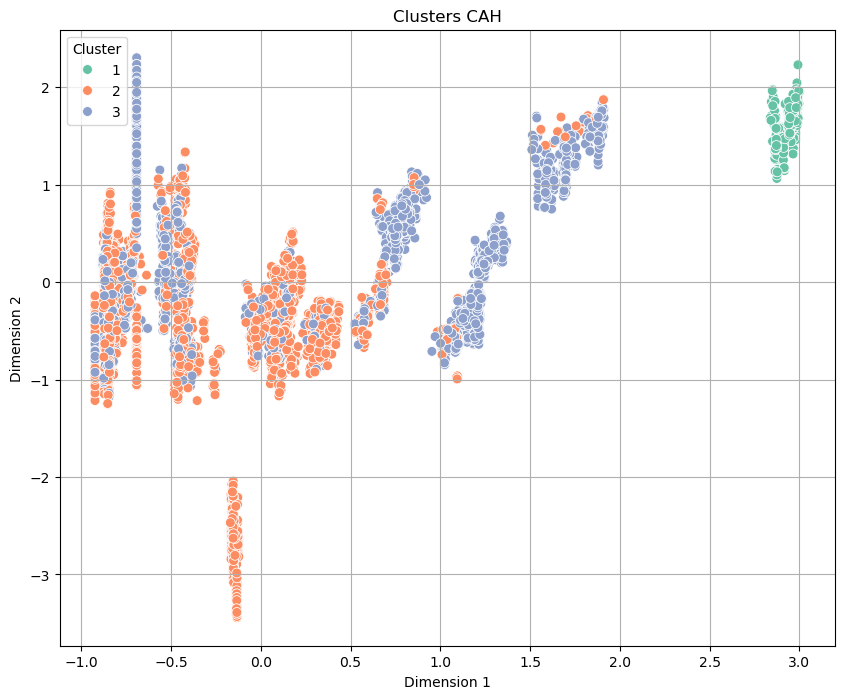

In [95]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X.values[:, 0],  # .values pour numpy array
    y=X.values[:, 1],
    hue=df['cluster_cah'],
    palette='Set2',
    s=50
)
plt.title("Clusters CAH")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


**Interprétation**  
**Cluster 3 (bleu)**  
Le plus grand groupe.  
Cryptomonnaies aux comportements variés mais relativement proches.  
Elles présentent une dynamique intermédiaire : ni trop agressive, ni extrêmement stable.  
**Cluster 2 (orange)**  
Groupe plus dispersé, couvrant une zone large.  
Traduit des cryptomonnaies plus hétérogènes, avec un comportement moins régulier.  
On peut les associer à un niveau de volatilité plus élevé.  
**Cluster 1 (vert)**  
Groupe très compact et bien séparé du reste.  
Cryptomonnaies homogènes et stables, avec un profil distinct.  
Ce cluster correspond à des actifs ayant un comportement plus "maîtrisé" et moins volatil.  

**3.K-Means**

In [96]:
silhouette_scores = []
K = range(2, 12)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"k={k} → Silhouette Score = {score:.4f}")


k=2 → Silhouette Score = 0.6230
k=3 → Silhouette Score = 0.2454
k=4 → Silhouette Score = 0.2737
k=5 → Silhouette Score = 0.2812
k=6 → Silhouette Score = 0.3172
k=7 → Silhouette Score = 0.3177
k=8 → Silhouette Score = 0.3338
k=9 → Silhouette Score = 0.3396
k=10 → Silhouette Score = 0.3317
k=11 → Silhouette Score = 0.3303


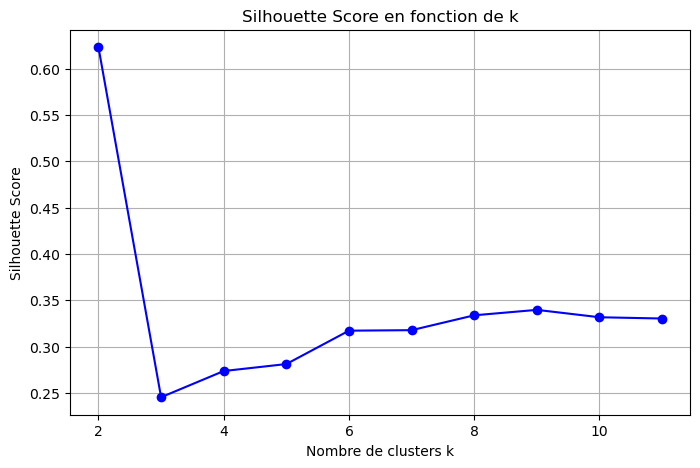


Meilleur k selon le Silhouette Score = 2
Score maximum = 0.6230


In [97]:
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score en fonction de k')
plt.grid(True)
plt.show()

# Meilleur k
best_k = K[np.argmax(silhouette_scores)]
print(f"\nMeilleur k selon le Silhouette Score = {best_k}")
print(f"Score maximum = {max(silhouette_scores):.4f}")

In [98]:
kmeans = KMeans(
    n_clusters=best_k,
    init="k-means++",
    n_init=10,
    max_iter=300,
    random_state=42
)

df["Cluster"] = kmeans.fit_predict(X)


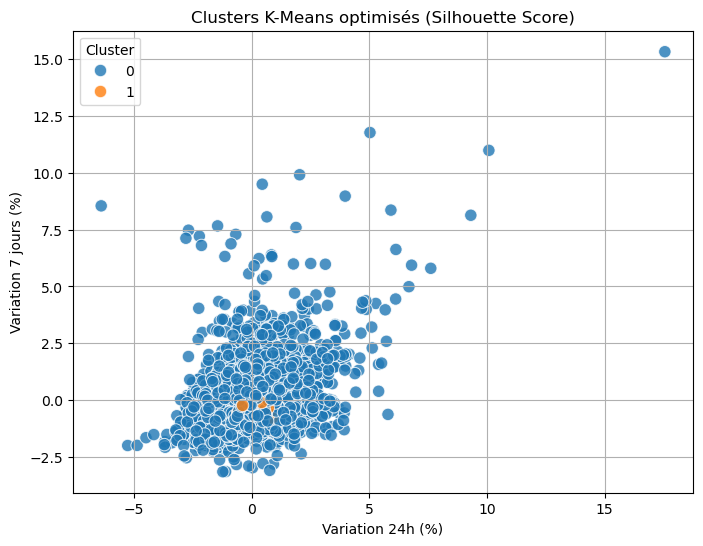

In [99]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="chg_24h",
    y="chg_7d",
    hue="Cluster",
    palette="tab10",
    s=80,
    alpha=0.8
)
plt.title("Clusters K-Means optimisés (Silhouette Score)")
plt.xlabel("Variation 24h (%)")
plt.ylabel("Variation 7 jours (%)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


**Interprétation :**
Le graphique montre que K-Means sépare clairement les cryptomonnaies en deux groupes : celles très volatiles et fortement fluctuantes (cluster bleu) et celles ayant des variations beaucoup plus faibles et stables sur 24h et 7 jours (cluster orange).


In [100]:
silhouette_avg = silhouette_score(X, df["Cluster"])
print(f"Silhouette Score final : {silhouette_avg:.3f}")

from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X, df["Cluster"])
print(f"Davies-Bouldin Score : {db_score:.3f}")


Silhouette Score final : 0.623
Davies-Bouldin Score : 0.383


**Interprétation :**
- Silhouette Score (0.588) :
Un score de 0.588 indique que les clusters sont bien séparés et que les données sont regroupées dans leurs clusters respectifs.
- Davies-Bouldin Score (0.421) :
 Un score de 0.421 montre que les clusters sont relativement compacts et éloignés les uns des autres, ce qui confirme une bonne qualité de partitionnement

**Modèles Sypervisés**

**1.SVM**

In [265]:
df['target'] = (df['chg_24h'].shift(-1) > 0).astype(int)
X = df[['price_usd', 'vol_24h', 'chg_7d', 'market_cap']]
y = df['target']


In [266]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [267]:
svm = SVC(class_weight='balanced', probability=True, random_state=42)

In [268]:
# Hyperparameter grid
param_grid = [
    {
        "kernel": ["linear"],
        "C": [0.1, 1, 10]
    },
    {
        "kernel": ["rbf"],
        "C": [1, 10],
        "gamma": ["scale", 0.1]
    },
    # Polynomial kernel:tests non-linear with degree 2–3
    {
        "kernel": ["poly"],
        "C": [1, 10],
        "degree": [2, 3],
        "gamma": ["scale"]
    }
]

In [269]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring="f1_macro",   # or "f1_weighted" / "accuracy"
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score (f1_macro):", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 3 folds for each of 11 candidates, totalling 33 fits
Best params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score (f1_macro): 0.49884518151378515


**Evaluation :**

In [270]:
print("\nTest accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Test accuracy: 0.554375

Confusion matrix:
 [[684 259]
 [454 203]]

Classification report:
               precision    recall  f1-score   support

           0       0.60      0.73      0.66       943
           1       0.44      0.31      0.36       657

    accuracy                           0.55      1600
   macro avg       0.52      0.52      0.51      1600
weighted avg       0.53      0.55      0.54      1600



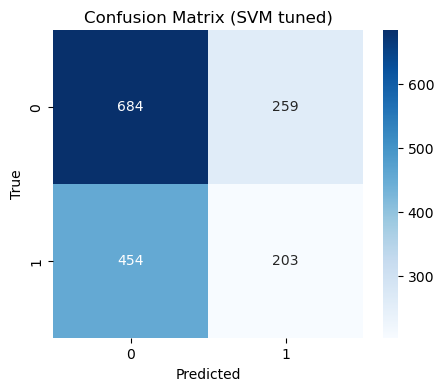

In [271]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (SVM tuned)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

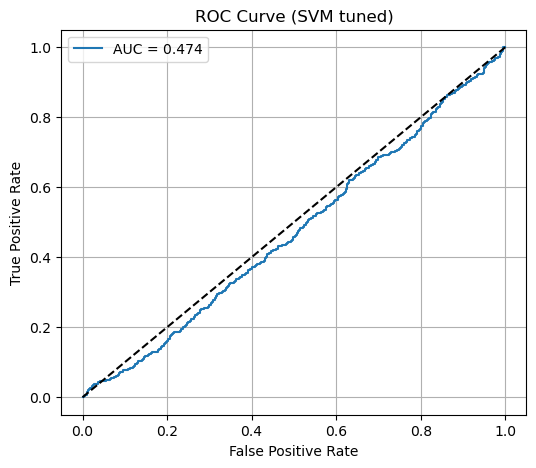

In [272]:
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SVM tuned)")
plt.legend()
plt.grid(True)
plt.show()


**2.CatBoost**

In [127]:
num_cols = ['price_usd', 'vol_24h', 'chg_24h', 'chg_7d', 'market_cap']
X = df[num_cols]
y = df['risk']

In [128]:
param_dist = {
    'depth': [4, 6, 8],
    'learning_rate': [0.03, 0.1],
    'l2_leaf_reg': [1, 3, 5],
}


In [129]:
model = CatBoostClassifier(
    loss_function='MultiClass',
    iterations=200,      # plus petit
    verbose=0,
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)
random_search.fit(X, y)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 18 candidates, totalling 54 fits


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000019489037B90>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'depth': [4, 6, 8],
                                        'l2_leaf_reg': [1, 3, 5],
                                        'learning_rate': [0.03, 0.1]},
                   scoring='accuracy', verbose=2)

In [130]:
print("Best params :", random_search.best_params_)
print("Best accuracy :", random_search.best_score_)

Best params : {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'depth': 8}
Best accuracy : 0.7025880485869499


In [131]:
best_params = random_search.best_params_
best_cat = CatBoostClassifier(
    **best_params,
    loss_function='MultiClass',
    verbose=100,
    random_state=42
)

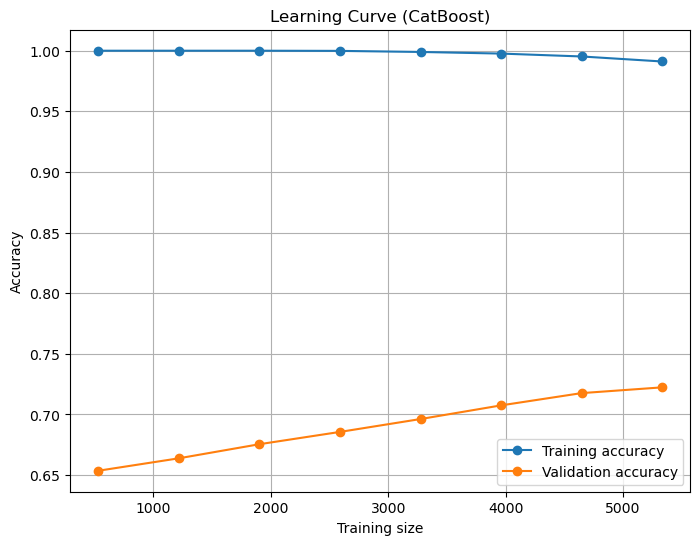

In [132]:
train_sizes, train_scores, val_scores = learning_curve(
    best_cat,
    X, y,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8)
)

# Mean curves
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label="Training accuracy")
plt.plot(train_sizes, val_mean, 'o-', label="Validation accuracy")
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (CatBoost)")
plt.legend()
plt.grid(True)
plt.show()

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
best_cat.fit(X_train, y_train)
y_pred = best_cat.predict(X_test)

0:	learn: 1.0316026	total: 13.8ms	remaining: 13.8s
100:	learn: 0.5356425	total: 1.59s	remaining: 14.2s
200:	learn: 0.4436035	total: 3.01s	remaining: 12s
300:	learn: 0.3839167	total: 4.49s	remaining: 10.4s
400:	learn: 0.3359946	total: 6s	remaining: 8.96s
500:	learn: 0.2979831	total: 7.39s	remaining: 7.36s
600:	learn: 0.2672186	total: 8.72s	remaining: 5.79s
700:	learn: 0.2413212	total: 9.99s	remaining: 4.26s
800:	learn: 0.2204253	total: 11.3s	remaining: 2.8s
900:	learn: 0.2003760	total: 12.5s	remaining: 1.38s
999:	learn: 0.1836204	total: 14s	remaining: 0us


In [134]:
print("Test accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification report :\n", classification_report(y_test, y_pred))

Test accuracy : 0.738125

Classification report :
               precision    recall  f1-score   support

 Speculative       0.67      0.35      0.46        62
      Stable       0.78      0.87      0.82      1063
    Volatile       0.61      0.50      0.55       475

    accuracy                           0.74      1600
   macro avg       0.69      0.57      0.61      1600
weighted avg       0.73      0.74      0.73      1600



**Interprétation**  
La capitalisation de marché est l’indicateur dominant pour classer les cryptomonnaies selon leur niveau de risque.  

Les cryptos à faible capitalisation sont beaucoup plus susceptibles d’être spéculatives, tandis que les grandes capitalisations sont majoritairement stables.  

Les variations de prix sur 24h et 7j contribuent également au risque mais de façon moins importante, et le prix unitaire d’une crypto est le facteur le moins déterminant.  

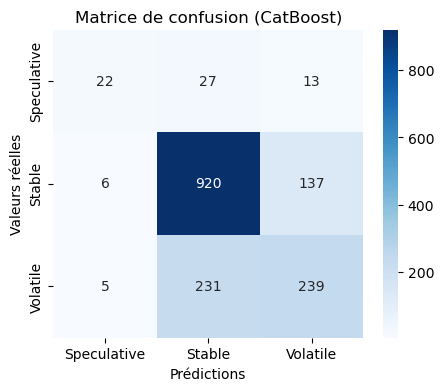

In [135]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_cat.classes_,
            yticklabels=best_cat.classes_)

plt.title("Matrice de confusion (CatBoost)")
plt.ylabel("Valeurs réelles")
plt.xlabel("Prédictions")
plt.show()

**Interprétation :**
Le modèle CatBoost classe très bien les cryptos “stables”, mais confond fréquemment les cryptos “volatiles” avec les stables et, dans une moindre mesure, les cryptos “spéculatives”, ce qui montre qu’il maîtrise bien la majorité stable mais a plus de difficulté à distinguer les comportements à risque élevé.

**3.XGBOOST**


In [141]:
num_cols = ['price_usd', 'vol_24h', 'chg_24h', 'chg_7d', 'market_cap']
X = df[num_cols].copy()

le = LabelEncoder()
y = le.fit_transform(df['risk'])          # risk -> 0/1/2
n_classes = len(le.classes_)
print("Classes:", list(le.classes_)) 

Classes: ['Speculative', 'Stable', 'Volatile']


In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [143]:
xgb_base = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=n_classes,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)


In [144]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    xgb_base, X, y,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

In [145]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

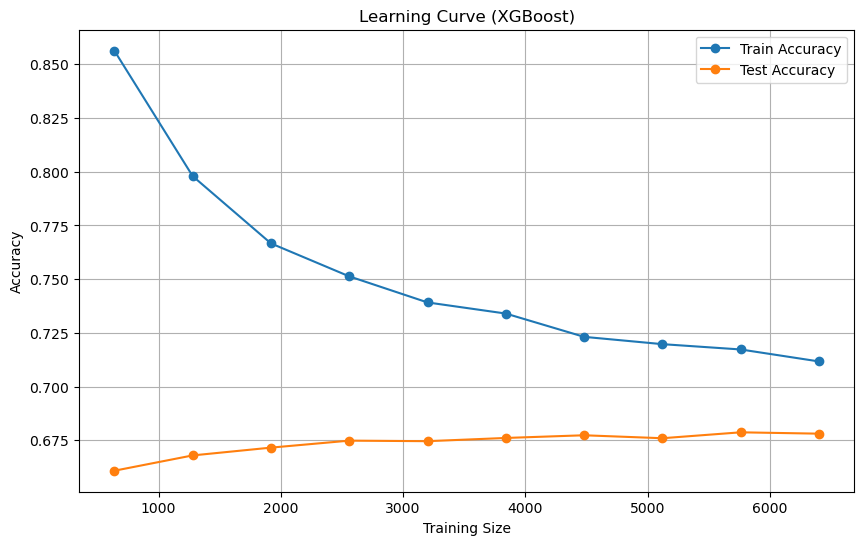

In [146]:
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, marker='o', label="Train Accuracy")
plt.plot(train_sizes, test_mean, marker='o', label="Test Accuracy")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (XGBoost)")
plt.legend()
plt.grid(True)
plt.show()

In [147]:
xgb_base.fit(X_train, y_train)
y_pred_base = xgb_base.predict(X_test)

Baseline Test Accuracy: 0.674375

Baseline Classification Report:
               precision    recall  f1-score   support

 Speculative       0.00      0.00      0.00        62
      Stable       0.69      0.93      0.80      1063
    Volatile       0.52      0.18      0.27       475

    accuracy                           0.67      1600
   macro avg       0.40      0.37      0.35      1600
weighted avg       0.61      0.67      0.61      1600



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


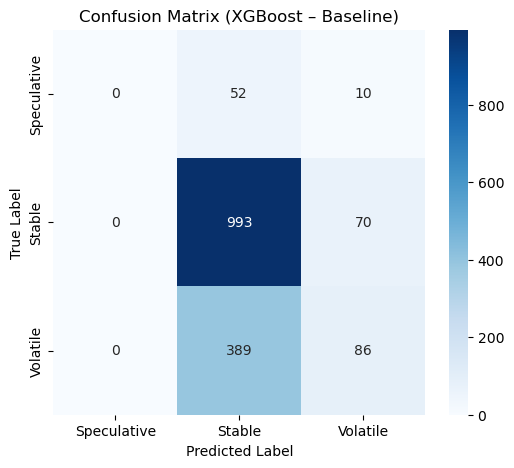

In [148]:
print("Baseline Test Accuracy:", accuracy_score(y_test, y_pred_base))
print("\nBaseline Classification Report:\n",
      classification_report(y_test, y_pred_base, target_names=le.classes_))

cm_base = confusion_matrix(y_test, y_pred_base)

plt.figure(figsize=(6,5))
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (XGBoost – Baseline)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**GridSearchCV**

In [149]:
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 4],
    "min_child_weight": [3, 10],
    "subsample": [0.7],
    "colsample_bytree": [0.7],
    "reg_lambda": [1.0, 5.0],
    "reg_alpha": [0.0, 1.0],
    "gamma": [0, 1.0],
}

In [150]:
xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=n_classes,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

In [151]:
grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

In [152]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_class=3, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'gamma': [0, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 4],
                         'min_child_weight': [3, 10],
                         'n_estimators': [100, 200], 'reg_alpha': [0.0, 1.0],
                         'reg_lambda': [1.0, 5.0], 'subsample': [0.7]},
             scoring='accuracy', verbose=2)

In [153]:
print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200, 'reg_alpha': 0.0, 'reg_lambda': 5.0, 'subsample': 0.7}
Best cross-validation accuracy: 0.6933895921237694


In [154]:
best_xgb = grid.best_estimator_
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

In [155]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.68875

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.06      0.12        62
           1       0.72      0.89      0.80      1063
           2       0.54      0.32      0.40       475

    accuracy                           0.69      1600
   macro avg       0.69      0.42      0.44      1600
weighted avg       0.67      0.69      0.65      1600



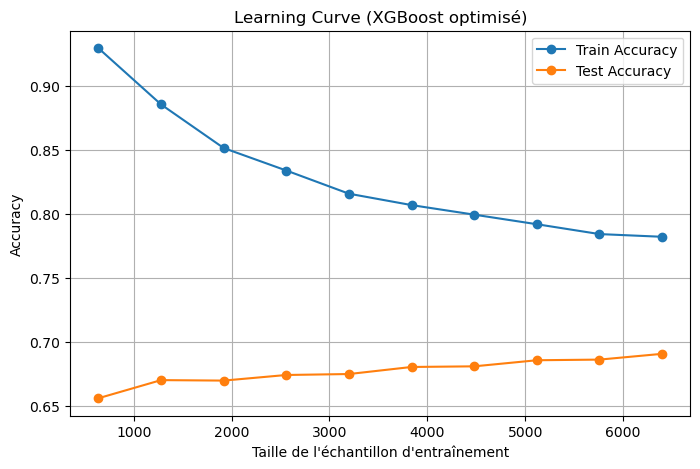

In [156]:
train_sizes, train_scores, test_scores = learning_curve(
    best_xgb,
    X,
    y,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = train_scores.mean(axis=1)
test_mean  = test_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label="Train Accuracy")
plt.plot(train_sizes, test_mean,  'o-', label="Test Accuracy")
plt.title("Learning Curve (XGBoost optimisé)")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

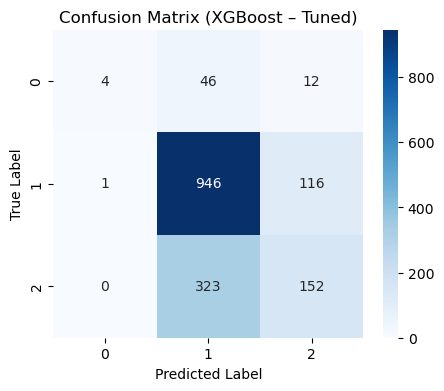

In [157]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (XGBoost – Tuned)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Logistic Regression**

In [167]:
df['target'] = (df['chg_24h'].shift(-1) > 0).astype(int)

X = df[['price_usd', 'vol_24h', 'chg_7d', 'market_cap']]
y = df['target']

X = X.iloc[:-1]
y = y.iloc[:-1]

In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(y_train.value_counts())
print(y_test.value_counts())

target
0    3772
1    2626
Name: count, dtype: int64
target
0    943
1    657
Name: count, dtype: int64


In [173]:
logreg = LogisticRegression(max_iter=2000)


In [174]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

In [175]:
grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [176]:
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)
best_lr = grid.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV accuracy: 0.5895592259577795


In [177]:
best_lr = grid.best_estimator_

y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)[:, 1]

In [178]:
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test accuracy: 0.589375
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       943
           1       0.00      0.00      0.00       657

    accuracy                           0.59      1600
   macro avg       0.29      0.50      0.37      1600
weighted avg       0.35      0.59      0.44      1600



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


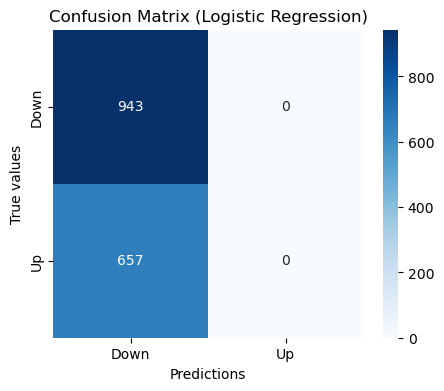

In [180]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Down', 'Up'],
            yticklabels=['Down', 'Up'])
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

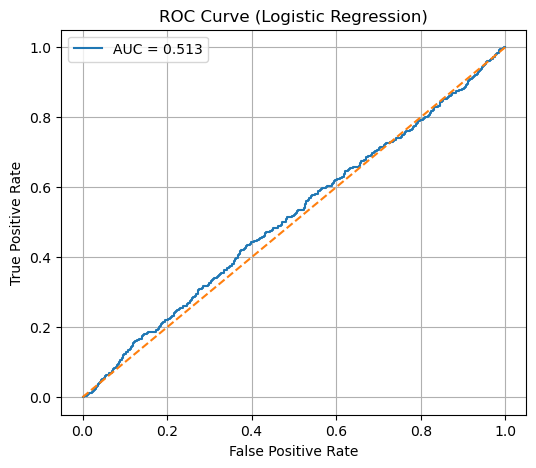

In [181]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression)")
plt.legend()
plt.grid(True)
plt.show()

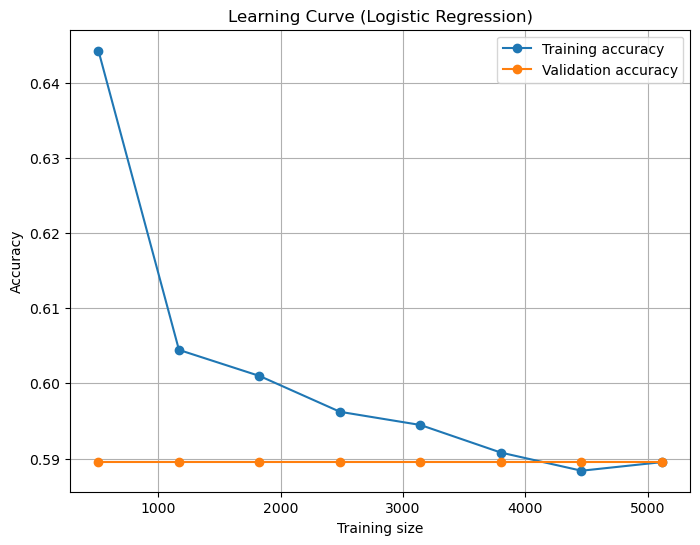

In [182]:
train_sizes, train_scores, val_scores = learning_curve(
    best_lr,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8)
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label='Training accuracy')
plt.plot(train_sizes, val_mean, 'o-', label='Validation accuracy')
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Logistic Regression)")
plt.legend()
plt.grid(True)
plt.show()

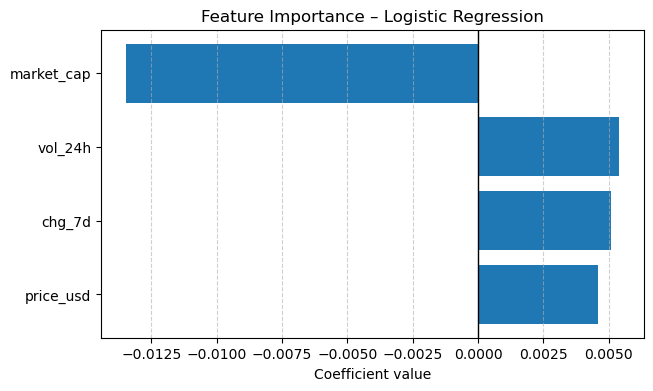

In [185]:
plt.figure(figsize=(7,4))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.axvline(0, color='black', linewidth=1)
plt.xlabel("Coefficient value")
plt.title("Feature Importance – Logistic Regression")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

**5. Random Forest**

In [190]:
features = ['price_usd', 'vol_24h', 'market_cap', 'chg_24h', 'chg_7d']

X_raw = df[features].copy()
y = df['risk'].copy()

In [191]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_raw)
X = X_pca

print("\nDistribution de la variable cible 'risk' :\n", y.value_counts())



Distribution de la variable cible 'risk' :
 risk
Stable         5313
Volatile       2374
Speculative     312
Name: count, dtype: int64


In [192]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print(X_train.shape)

(6399, 3)


In [193]:
rf_classifier = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)


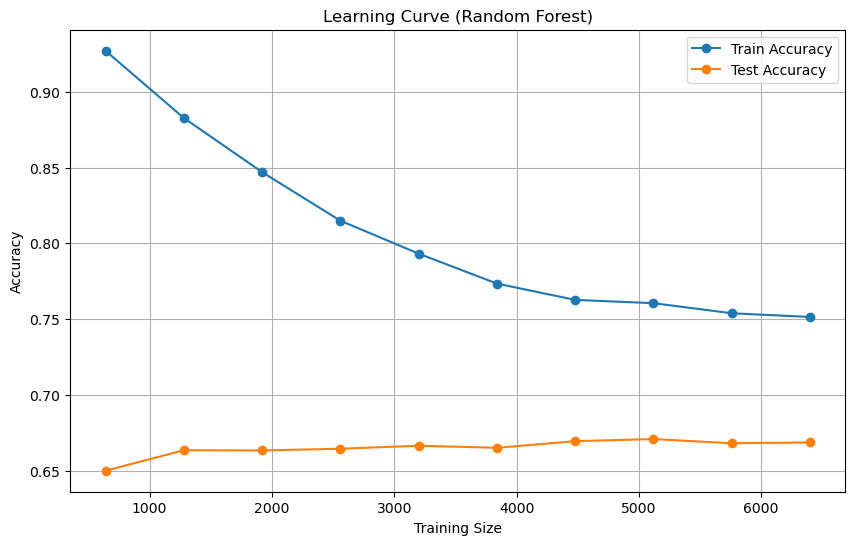

In [194]:
train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier,
    X,
    y,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, marker='o', label="Train Accuracy")
plt.plot(train_sizes, test_mean, marker='o', label="Test Accuracy")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

**Interprétation :**
La courbe montre un fort surapprentissage : l’accuracy d’entraînement reste très élevée tandis que celle du test reste nettement plus basse et progresse peu, indiquant que le modèle n’apprend pas à généraliser malgré l’augmentation des données.

In [195]:
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [196]:
print("\nRapport de Classification :\n", classification_report(y_test, y_pred))


Rapport de Classification :
               precision    recall  f1-score   support

 Speculative       0.67      0.03      0.06        62
      Stable       0.69      0.95      0.80      1063
    Volatile       0.54      0.15      0.24       475

    accuracy                           0.68      1600
   macro avg       0.63      0.38      0.37      1600
weighted avg       0.64      0.68      0.60      1600



In [197]:
param_distribs = {
    'n_estimators': [300, 500, 700],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf_clf = RandomForestClassifier(random_state=42)

In [198]:
rnd_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=param_distribs,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
rnd_search.fit(X_train, y_train)
print(f"Meilleure Accuracy trouvée par validation croisée: {rnd_search.best_score_:.3f}")
print("Meilleurs Hyperparamètres:", rnd_search.best_params_)

Meilleure Accuracy trouvée par validation croisée: 0.672
Meilleurs Hyperparamètres: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30}


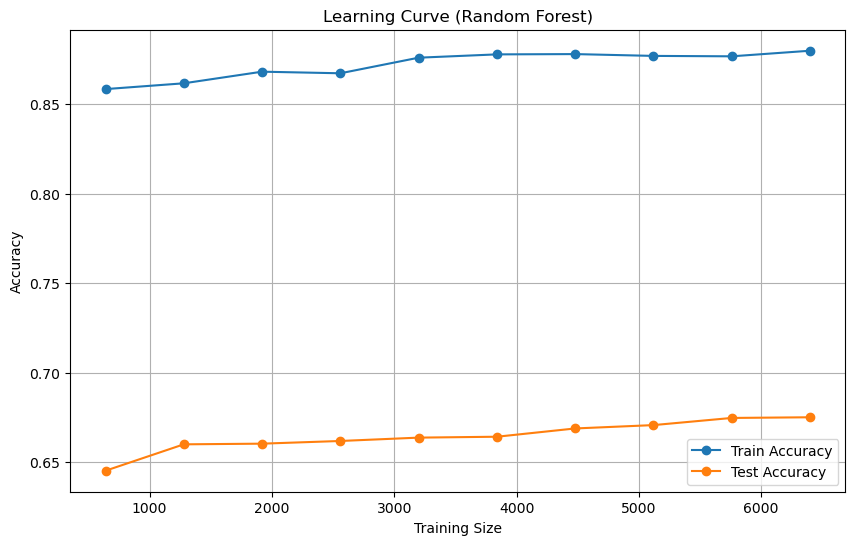

Précision (Accuracy) : 0.678125


In [199]:
best_rf_classifier = rnd_search.best_estimator_
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_classifier,
    X,
    y,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, marker='o', label="Train Accuracy")
plt.plot(train_sizes, test_mean, marker='o', label="Test Accuracy")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()
y_pred_best = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Précision (Accuracy) : {accuracy:}")

In [200]:
print("\nRapport de Classification :\n", classification_report(y_test, y_pred_best))


Rapport de Classification :
               precision    recall  f1-score   support

 Speculative       0.00      0.00      0.00        62
      Stable       0.72      0.86      0.78      1063
    Volatile       0.51      0.36      0.43       475

    accuracy                           0.68      1600
   macro avg       0.41      0.41      0.40      1600
weighted avg       0.63      0.68      0.65      1600



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


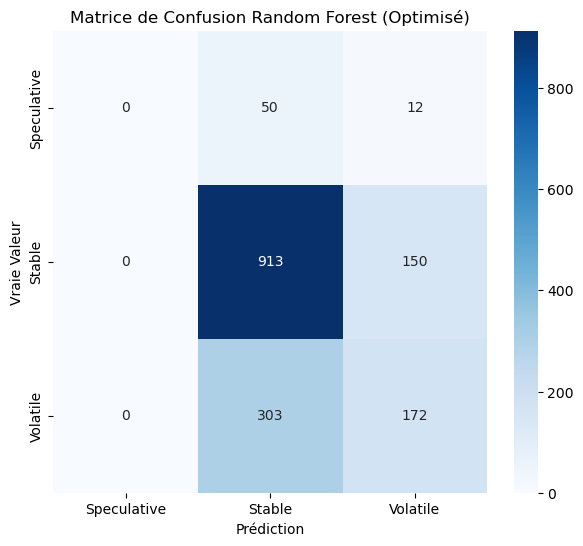

In [201]:
conf_mat = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(7, 6))

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_rf_classifier.classes_, yticklabels=best_rf_classifier.classes_)
plt.title('Matrice de Confusion Random Forest (Optimisé)')
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_22004\811223892.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


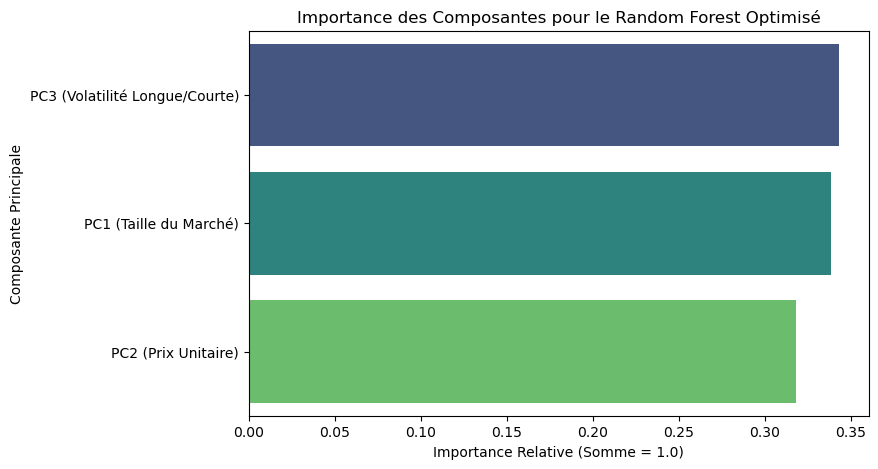

In [202]:
feature_importances = best_rf_classifier.feature_importances_
feature_names = ['PC1 (Taille du Marché)', 'PC2 (Prix Unitaire)', 'PC3 (Volatilité Longue/Courte)']
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importance des Composantes pour le Random Forest Optimisé')
plt.xlabel('Importance Relative (Somme = 1.0)')
plt.ylabel('Composante Principale')
plt.show()

**6.KNN**

In [203]:
# Préparation des données
features = ['price_usd', 'vol_24h', 'market_cap', 'chg_24h', 'chg_7d']
X = df[features].copy()
df['target'] = (df['chg_24h'].shift(-1) > 0).astype(int)
y = df.loc[X.index, 'target']

# Remettre l’index propre pour TimeSeriesSplit
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
tscv = TimeSeriesSplit(n_splits=5)

In [204]:
# 1. GridSearchCV
param_grid = {
    'n_neighbors': [3,5,7,9,11,13,15,17,21,25,31,41,51],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine', 'chebyshev'],
}

In [205]:
knn = KNeighborsClassifier()

In [206]:
grid = GridSearchCV(knn, param_grid, cv=tscv, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine',
                                    'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 21, 25, 31,
                                         41, 51],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [207]:
print("GRID SEARCH – Meilleur KNN :")
print(grid.best_params_)
print(f"Accuracy = {grid.best_score_:.4f}")

GRID SEARCH – Meilleur KNN :
{'metric': 'chebyshev', 'n_neighbors': 51, 'weights': 'uniform'}
Accuracy = 0.5706


In [208]:
# 2. RandomizedSearchCV
param_dist = {
    'n_neighbors': [3,5,7,9,11,13,15,17,21,25,31,41,51],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine', 'chebyshev'],
    'p': uniform(1, 4)  # seulement si metric='minkowski'
}

In [209]:
random = RandomizedSearchCV(knn, param_dist, n_iter=50, cv=tscv,
                            scoring='accuracy', random_state=42, n_jobs=-1)
random.fit(X, y)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'cosine', 'chebyshev'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                        17, 21, 25, 31, 41,
                                                        51],
                                        'p': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000194A38326F0>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [210]:
print("\nRANDOM SEARCH – Meilleur KNN :")
print(random.best_params_)
print(f"Accuracy = {random.best_score_:.4f}")


RANDOM SEARCH – Meilleur KNN :
{'metric': 'chebyshev', 'n_neighbors': 51, 'p': 4.332779646944657, 'weights': 'uniform'}
Accuracy = 0.5706


In [211]:
# KNN
knn = KNeighborsClassifier(n_neighbors=51, weights='uniform', metric='chebyshev')
tscv = TimeSeriesSplit(n_splits=5)

scores = []
for train_idx, test_idx in tscv.split(X):
    knn.fit(X.iloc[train_idx], y.iloc[train_idx])
    pred = knn.predict(X.iloc[test_idx])
    scores.append(accuracy_score(y.iloc[test_idx], pred))

print("KNN :")
print(f"Accuracy moyenne = {np.mean(scores):.4f} ± {np.std(scores):.4f}")


KNN :
Accuracy moyenne = 0.5706 ± 0.0158


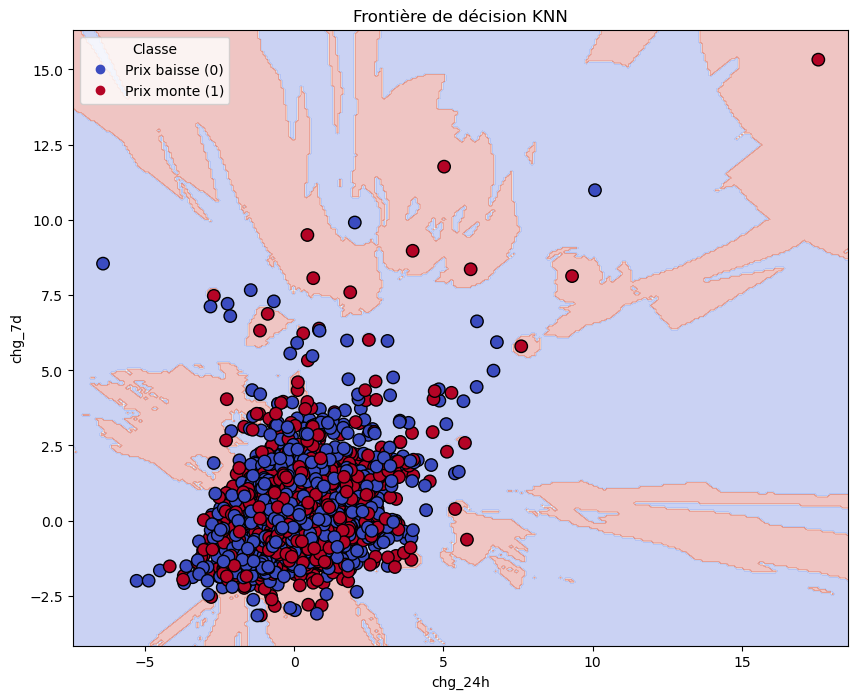

In [212]:
# Choisir 2 features pour visualiser
feat1 = 'chg_24h'
feat2 = 'chg_7d'

X_vis = X[[feat1, feat2]].values
y_vis = y.values

# KNN avec le meilleur k trouvé
knn_best = KNeighborsClassifier(n_neighbors=51, weights='distance', metric='euclidean')
knn_best.fit(X_vis, y_vis)

# Création de la grille pour la frontière
x_min, x_max = X_vis[:,0].min() - 1, X_vis[:,0].max() + 1
y_min, y_max = X_vis[:,1].min() - 1, X_vis[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Points réels
scatter = plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, cmap='coolwarm', s=80, edgecolor='k')

# Légende explicite pour 0 et 1
plt.legend(handles=scatter.legend_elements()[0], labels=["Prix baisse (0)", "Prix monte (1)"], title="Classe")

plt.title("Frontière de décision KNN")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.show()


**Interprétation :**
- La majorité des points rouges (Prix monte) sont dans la zone rose et les bleus (Prix baisse) dans la zone bleue, ce qui montre que le KNN capture partiellement la tendance.

- Il y a cependant beaucoup de points qui se trouvent dans la zone opposée, ce qui explique que l’accuracy globale n’est pas très élevée.

- Les zones bleues sont très limitées, ce qui suggère que le modèle prédit souvent "Prix monte", probablement à cause de l’asymétrie des classes (plus de hausses que de baisses).

**7. Linear regression**

In [213]:
df.describe()

,price_usd,vol_24h,chg_24h,chg_7d,market_cap,cluster_cah,Cluster,target
count,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7999.000000,7999.000000,7999.000000
mean,5.329737e-17,-2.025300e-16,7.106316e-18,3.597572e-17,-3.881825e-16,2.453057,0.045256,0.410426
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,0.581679,0.207877,0.491942
min,-9.237717e-01,-3.444730e+00,-6.402932e+00,-3.151962e+00,-4.501234e+00,1.000000,0.000000,0.000000
25%,-7.631983e-01,-5.519783e-01,-4.678913e-01,-4.788627e-01,-6.561826e-03,2.000000,0.000000,0.000000
50%,-4.331749e-01,-1.074195e-01,-8.934054e-02,-1.968512e-01,8.051169e-02,2.000000,0.000000,0.000000
75%,5.692903e-01,5.534842e-01,3.712737e-01,3.389707e-01,4.108039e-01,3.000000,0.000000,1.000000
max,3.000596e+00,2.304564e+00,1.755695e+01,1.532488e+01,8.592680e-01,3.000000,1.000000,1.000000


In [214]:
features = ['vol_24h', 'market_cap', 'chg_24h', 'chg_7d']
X = df[features].copy()
y = df['price_usd']

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
def eval_reg(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, rmse

results = []

In [217]:
y_pred_naive = np.full(shape=len(y_test), fill_value=y_train.mean(), dtype=float)
r2, mae, rmse = eval_reg(y_test, y_pred_naive)
results.append(["Naive mean baseline", None, r2, mae, rmse])

In [218]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [219]:
y_pred_lr  = lr.predict(X_test)

In [220]:
r2, mae, rmse = eval_reg(y_test, y_pred_lr)
results.append(["LinearRegression", None, r2, mae, rmse])

print("Linear Regression metrics")
print(f"R2   : {r2:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")

Linear Regression metrics
R2   : 0.3602
MAE  : 0.6787
RMSE : 0.7933


**interprétation**
Le R² de 0.36 montre que la régression linéaire n’explique qu’une faible proportion de la variance, indiquant un pouvoir prédictif limité.  

Le MAE de 0.68 révèle une erreur moyenne relativement élevée entre les valeurs prédites et réelles.  

Le RMSE de 0.79 confirme cette tendance, suggérant des écarts importants et fréquents dans les prédictions.  

Globalement, le modèle linéaire peine à capturer la structure des données, ce qui est cohérent avec la nature non linéaire du problème.  

In [221]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

In [222]:
display(coef_df)

,Feature,Coefficient
1,market_cap,-0.519660
0,vol_24h,0.246694
3,chg_7d,0.045671
2,chg_24h,0.005459


In [224]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge()
ridge_grid = GridSearchCV(
    ridge,
    param_grid={"alpha": [0.1, 1, 10, 100, 1000]},
    scoring="r2",
    cv=5,
    n_jobs=-1
)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
r2, mae, rmse = eval_reg(y_test, y_pred_ridge)
results.append(["Ridge", ridge_grid.best_params_, r2, mae, rmse])

In [225]:
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(
    lasso,
    param_grid={"alpha": [0.0001, 0.001, 0.01, 0.1, 1]},
    scoring="r2",
    cv=5,
    n_jobs=-1
)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
r2, mae, rmse = eval_reg(y_test, y_pred_lasso)
results.append(["Lasso", lasso_grid.best_params_, r2, mae, rmse])

In [226]:
enet = ElasticNet(max_iter=10000)
enet_grid = GridSearchCV(
    enet,
    param_grid={
        "alpha": [0.001, 0.01, 0.1, 1],
        "l1_ratio": [0.2, 0.5, 0.8]
    },
    scoring="r2",
    cv=5,
    n_jobs=-1
)
enet_grid.fit(X_train, y_train)
best_enet = enet_grid.best_estimator_
y_pred_enet = best_enet.predict(X_test)
r2, mae, rmse = eval_reg(y_test, y_pred_enet)
results.append(["ElasticNet", enet_grid.best_params_, r2, mae, rmse])

In [227]:
print("\nBest params:")
print("Ridge:", ridge_grid.best_params_)
print("Lasso:", lasso_grid.best_params_)
print("ElasticNet:", enet_grid.best_params_)



Best params:
Ridge: {'alpha': 1}
Lasso: {'alpha': 0.001}
ElasticNet: {'alpha': 0.001, 'l1_ratio': 0.8}


In [228]:
results_df = pd.DataFrame(results, columns=["Model", "BestParams", "R2", "MAE", "RMSE"])
results_df = results_df.sort_values(by="R2", ascending=False)
display(results_df)

,Model,BestParams,R2,MAE,RMSE
3,Lasso,{'alpha': 0.001},0.360297,0.678790,0.793242
4,ElasticNet,"{'alpha': 0.001, 'l1_ratio': 0.8}",0.360271,0.678785,0.793258
2,Ridge,{'alpha': 1},0.360165,0.678684,0.793324
1,LinearRegression,None,0.360164,0.678669,0.793325
0,Naive mean baseline,None,-0.000287,0.791939,0.991925


In [229]:
train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(),
    X, y,
    cv=5,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)


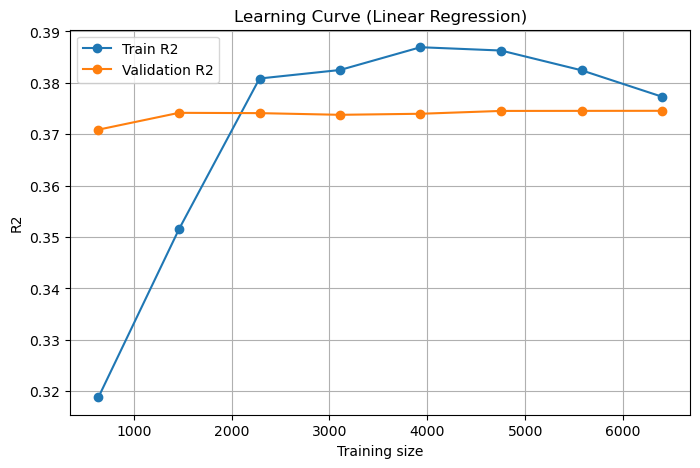

In [230]:
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label="Train R2")
plt.plot(train_sizes, val_mean, 'o-', label="Validation R2")
plt.xlabel("Training size")
plt.ylabel("R2")
plt.title("Learning Curve (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

**8. polynomial regression**

In [236]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

features = ['vol_24h', 'market_cap', 'chg_24h', 'chg_7d']
X = df[features].copy()
y = df['price_usd'].copy()

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('ridge', Ridge())
])

In [239]:
param_grid = {
    'poly__degree': list(range(1, 9)),                # degrees 1..8
    'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000]     # regularization strengths
}

In [240]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [241]:
grid.fit(X_train, y_train)

best_poly = grid.best_estimator_
print("=== Best Polynomial + Ridge (CV) ===")
print("Best params:", grid.best_params_)
print("Best CV R2 :", grid.best_score_)
print()


Fitting 5 folds for each of 48 candidates, totalling 240 fits
=== Best Polynomial + Ridge (CV) ===
Best params: {'poly__degree': 4, 'ridge__alpha': 0.1}
Best CV R2 : 0.6397142378500721



In [242]:
y_pred = best_poly.predict(X_test)

print("=== Best Polynomial + Ridge (Test) ===")
print("Test R2   :", r2_score(y_test, y_pred))
print("Test MAE  :", mean_absolute_error(y_test, y_pred))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print()

=== Best Polynomial + Ridge (Test) ===
Test R2   : 0.6059625227074413
Test MAE  : 0.4948682259613786
Test RMSE : 0.6225659672062159



In [243]:
best_alpha = grid.best_params_['ridge__alpha']

rows = []
for d in range(1, 9):
    model_d = Pipeline([
        ('poly', PolynomialFeatures(degree=d, include_bias=False)),
        ('ridge', Ridge(alpha=best_alpha))
    ])
    model_d.fit(X_train, y_train)

    pred_train = model_d.predict(X_train)
    pred_test  = model_d.predict(X_test)

    rows.append({
        "Degree": d,
        "Train R2": r2_score(y_train, pred_train),
        "Test R2": r2_score(y_test, pred_test),
        "Test MAE": mean_absolute_error(y_test, pred_test),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, pred_test)),
    })

poly_results_df = pd.DataFrame(rows).sort_values(by="Test R2", ascending=False)
print("=== Degree comparison (using best alpha) ===")
display(poly_results_df)


=== Degree comparison (using best alpha) ===


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.61487e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.5927e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,Degree,Train R2,Test R2,Test MAE,Test RMSE
2,3,0.636300,6.151361e-01,0.509097,0.615276
3,4,0.659082,6.059625e-01,0.494868,0.622566
1,2,0.539029,5.036339e-01,0.596564,0.698743
0,1,0.381120,3.601639e-01,0.678671,0.793325
4,5,0.683956,-1.684115e+00,0.496782,1.624865
5,6,0.717530,-1.692679e+03,1.461204,40.816162
6,7,0.727690,-1.200052e+05,9.076453,343.572524
7,8,0.741033,-1.185627e+07,86.116088,3414.999399


In [244]:
train_sizes, train_scores, val_scores = learning_curve(
    best_poly,
    X, y,
    cv=5,
    scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)

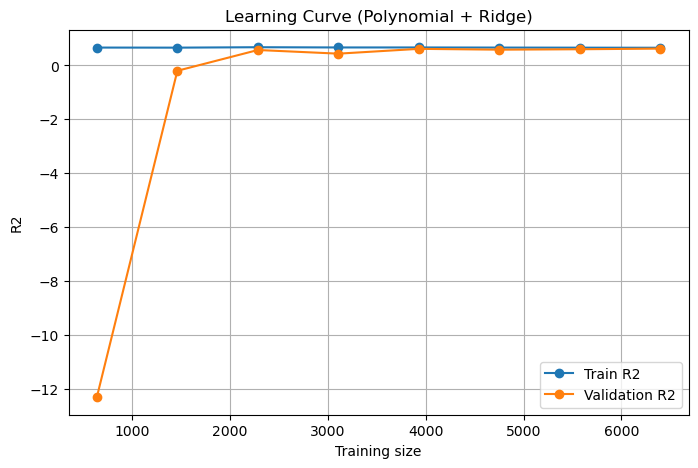

In [245]:
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label="Train R2")
plt.plot(train_sizes, val_mean, 'o-', label="Validation R2")
plt.xlabel("Training size")
plt.ylabel("R2")
plt.title("Learning Curve (Polynomial + Ridge)")
plt.legend()
plt.grid(True)
plt.show()

**XGBOOST regressor**

In [247]:
features = ['vol_24h', 'market_cap', 'chg_24h', 'chg_7d']
X = df[features].copy()
y = df['price_usd'].copy()

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

In [250]:
param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
}

In [251]:
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train, y_train)

print("=== Best parameters ===")
print(grid_xgb.best_params_)
print("Best CV RMSE:", np.sqrt(-grid_xgb.best_score_))
print()

Fitting 3 folds for each of 243 candidates, totalling 729 fits
=== Best parameters ===
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.7}
Best CV RMSE: 0.34253216246029394



In [252]:
best_xgb = grid_xgb.best_estimator_ 
y_pred_xgb = best_xgb.predict(X_test)

In [253]:
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("=== Test performance ===")
print(f"Test R2   : {test_r2:.4f}")
print(f"Test MAE  : {test_mae:.4f}")
print(f"Test RMSE : {test_rmse:.4f}")
print()

=== Test performance ===
Test R2   : 0.6060
Test MAE  : 0.4949
Test RMSE : 0.6226



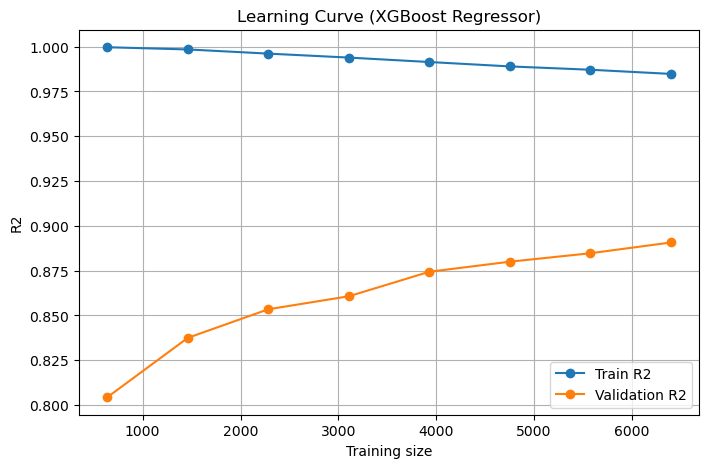

In [255]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(
    best_xgb,
    X, y,
    cv=cv,
    scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label="Train R2")
plt.plot(train_sizes, val_mean, 'o-', label="Validation R2")
plt.xlabel("Training size")
plt.ylabel("R2")
plt.title("Learning Curve (XGBoost Regressor)")
plt.legend()
plt.grid(True)
plt.show()

,Feature,Importance
1,market_cap,0.770814
0,vol_24h,0.096185
3,chg_7d,0.085569
2,chg_24h,0.047431


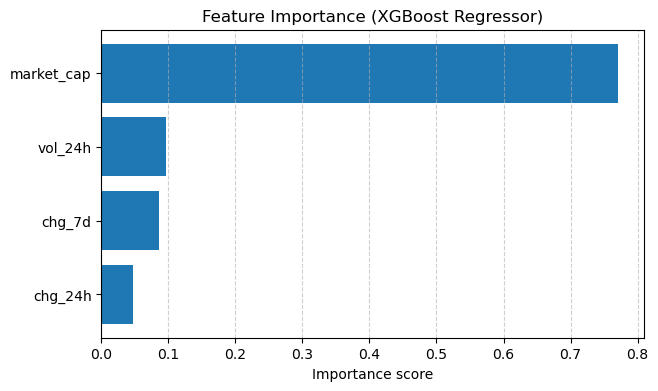

In [256]:
importances = best_xgb.feature_importances_
imp_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

display(imp_df)

plt.figure(figsize=(7,4))
plt.barh(imp_df["Feature"], imp_df["Importance"])
plt.title("Feature Importance (XGBoost Regressor)")
plt.xlabel("Importance score")
plt.gca().invert_yaxis()
plt.grid(True, axis="x", linestyle="--", alpha=0.6)
plt.show()

**Comparaison entre les 3 modeles**  
La régression linéaire obtient un R² faible et des erreurs élevées, montrant qu’elle ne parvient pas à capturer la structure du problème, probablement en raison de sa nature strictement linéaire.  

La régression polynomiale améliore légèrement le pouvoir explicatif grâce à une capacité à modéliser des relations non linéaires, mais ses performances restent limitées et ses erreurs encore importantes.  

Le modèle de gradient boosting (XGBoost) se distingue nettement par un R² beaucoup plus élevé et des erreurs nettement plus faibles, indiquant une meilleure capacité à saisir la complexité et la non-linéarité des données et à fournir des prédictions plus fiables.  